# **Introduction et Objectif**  

## Contexte  
Le naufrage du Titanic est l’un des désastres maritimes les plus célèbres de l’histoire. L’objectif de cette analyse exploratoire (EDA) est d'explorer les facteurs ayant influencé la survie des passagers du Titanic. Grâce aux données disponibles, nous allons identifier les variables clés qui ont eu un impact significatif sur les chances de survie.

## Questions à explorer  
🔹 Quels étaient les profils des survivants (âge, sexe, classe, etc.) ?  
🔹 Les passagers de première classe avaient-ils plus de chances de survie que ceux des classes inférieures ?  
🔹 Les femmes et les enfants ont-ils réellement été prioritaires lors de l’évacuation ?  
🔹 Le prix du billet ou la possession d’une cabine ont-ils influencé les chances de survie ?  
🔹 Y a-t-il des tendances particulières en fonction du port d'embarquement ou de la taille des familles ?  

## Méthodologie  
Nous allons structurer cette analyse en plusieurs étapes :  
1. **Chargement des Données et Prétraitement**: Imports des librairies, chargement des données, gestion des valeurs manquantes. 
2.  **Exploration des données** : Analyse univariée pour comprendre la distribution des variables.  
3. **Analyse bivariée** : Étude des relations entre chaque variable et la survie.  
4. **Analyse multivariée** : Croisement de plusieurs variables pour identifier des tendances plus fines.  
5. **Détection et traitement des outliers** pour éviter les biais.  
6. **Synthèse des résultats et insights clés** pour conclure sur les facteurs les plus déterminants.


---
# **1- Chargement des Données et Prétraitement**

## **Import des librairies et Chargement des données**

In [4]:
#Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configuration des graphiques 
sns.set(style='darkgrid') 

#Chargement du dataset Titanic 
titanic_df = pd.read_csv("data/train.csv")

# Conserver une copie brute
titanic_raw = titanic_df.copy()

## **Aperçu des données**

In [6]:
#Aperçu des données 
titanic_raw.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Vérification et traitement des valeurs manquantes** 

In [8]:
#Informations sur le dataset
titanic_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Statistiques descriptives 
titanic_raw.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


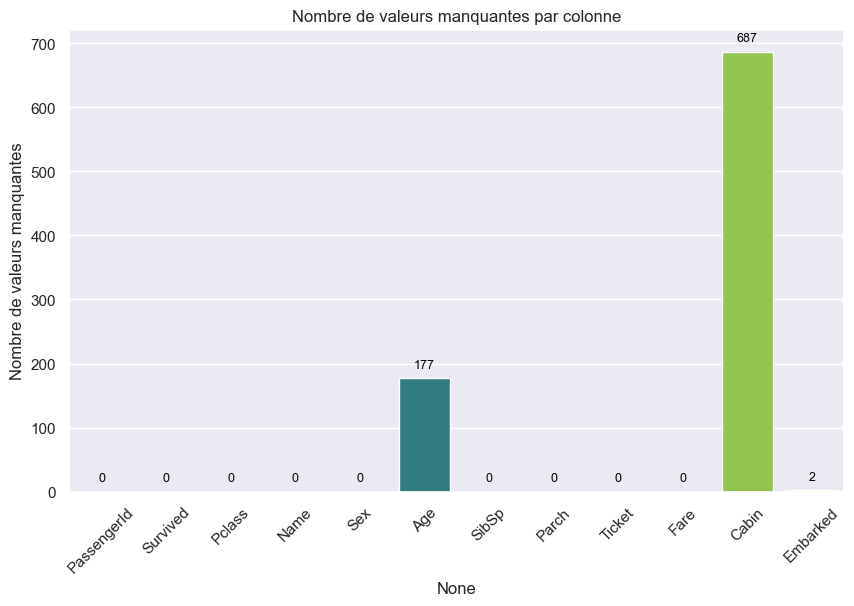

In [10]:
# Recalculer les valeurs manquantes
missing_values = titanic_raw.isnull().sum()

# Barplot des valeurs manquantes avec annotations
plt.figure(figsize=(10,6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette='viridis', legend=False)
plt.title("Nombre de valeurs manquantes par colonne")
plt.ylabel("Nombre de valeurs manquantes")
plt.xticks(rotation=45)

# Ajouter des annotations pour chaque barre
for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

**Plan de nettoyage :**  
  
Identifier les colonnes concernées :  
Age : ~19.9% de valeurs manquantes.  
Cabin : ~77% de valeurs manquantes.  
Embarked : 2 valeurs manquantes.  
.  
  
**Actions possibles:**  
- **Colonnes avec peu de valeurs manquantes (ex: Embarked) ➔ Imputation.**  
- **Colonnes avec un taux modéré (ex: Age) ➔ Remplir avec la médiane/moyenne.**
  - Dans ce cas, utiliser médiane car moins influencée par valeurs extrêmes que moyenne.
- **Colonnes avec trop de valeurs manquantes (ex: Cabin) ➔ Suppression ou simplification.**    
  - Supprimer la colonne (trop de valeurs manquantes).  
  - Créer une nouvelle variable : Indiquer si une cabine est connue ou non (feature engineering).
  

### **Traitement des valeurs manquantes pour Embarked**

In [13]:
# Vérifier le mode pour 'Embarked' (la valeur la plus fréquente) 
mode_embarked = titanic_df['Embarked'].mode()[0]
print(f"Le mode de 'Embarked' est : {mode_embarked}")

# Remplacer les valeurs manquantes par le mode
titanic_df.fillna({'Embarked': mode_embarked}, inplace=True)


# Vérification
print(titanic_df['Embarked'].isnull().sum())


Le mode de 'Embarked' est : S
0


### **Traitement des valeurs manquantes pour Age**

In [15]:
# Calcul de la médiane d'Age
median_age = titanic_df['Age'].median()
print(f"Médiane d'Age : {median_age}")

# Remplissage des valeurs manquantes
titanic_df.fillna({'Age': median_age}, inplace=True)

# Vérification
print(titanic_df['Age'].isnull().sum())

Médiane d'Age : 28.0
0


### **Traitement des valeurs manquantes pour Cabin**
**Création de la colonne Has_Cabin** *(feature engineering)*  
**Suppression de la colonne Cabin**

In [17]:
# Vérifie si la colonne 'Has_Cabin' existe déjà pour éviter de la recréer
if 'Has_Cabin' not in titanic_df.columns and 'Cabin' in titanic_df.columns:
    # Créer la colonne 'Has_Cabin' (1 si une cabine est indiquée, 0 sinon)
    titanic_df['Has_Cabin'] = titanic_df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
    print("✅ La colonne 'Has_Cabin' a été créée avec succès.")

# Vérification rapide
if 'Cabin' in titanic_df.columns:
    print("🔍 Affichage des colonnes 'Cabin' et 'Has_Cabin' :")
    print(titanic_df[['Cabin', 'Has_Cabin']].head())
else:
    print("⚠️ La colonne 'Cabin' a déjà été supprimée.")
    if 'Has_Cabin' in titanic_df.columns:
        print("➡️ La colonne 'Has_Cabin' est déjà présente dans le dataset. Voici un aperçu :")
        print(titanic_df[['Has_Cabin']].head())
    else:
        print("🚫 La colonne 'Has_Cabin' n'existe pas dans le dataset.")

# Supprime la colonne 'Cabin' uniquement si elle existe
if 'Cabin' in titanic_df.columns:
    titanic_df.drop('Cabin', axis=1, inplace=True)
    print("🗑️ La colonne 'Cabin' a été supprimée du dataset.")



✅ La colonne 'Has_Cabin' a été créée avec succès.
🔍 Affichage des colonnes 'Cabin' et 'Has_Cabin' :
  Cabin  Has_Cabin
0   NaN          0
1   C85          1
2   NaN          0
3  C123          1
4   NaN          0
🗑️ La colonne 'Cabin' a été supprimée du dataset.


### **Vérification finale des valeurs manquantes**

In [19]:
# Vérification générale des valeurs manquantes
missing_final = titanic_df.isnull().sum()
print("🔍 Valeurs manquantes restantes :")
print(missing_final[missing_final > 0])

🔍 Valeurs manquantes restantes :
Series([], dtype: int64)


---
**Maintenant que les données sont nettoyées**  
## **Nous pouvons commencer l'EDA.** 

# **2- Exploration des données** *(Analyse univariée)*

### **Variables catégorielles**
*Sex, Pclass, Embarked, Survived*

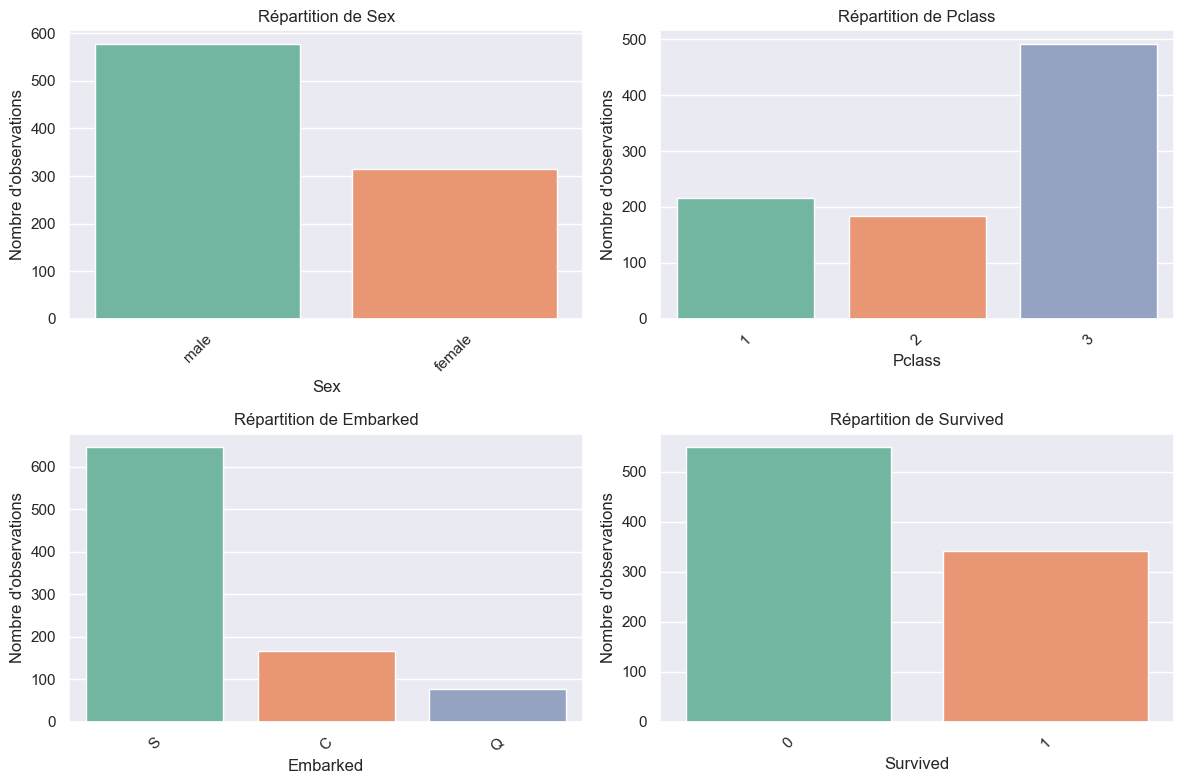

In [23]:
# Liste des colonnes catégorielles
categorical_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']

# Création des countplots
plt.figure(figsize=(12,8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=titanic_df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f"Répartition de {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


**Analyse:**  
  
- **Sex (Sexe) :**  
  - Résultat : Plus d'hommes que de femmes.  
  - À explorer : Les femmes ont-elles eu un meilleur taux de survie ? (Règle du "women and children first").  
- **Pclass (Classe du billet) :**  
  - Résultat : Des passagers dans les 3 classes, mais plus en 3e classe.  
  - À explorer : Le taux de survie était-il meilleur en 1ère classe ?  
- **Embarked (Port d'embarquement) :**  
  - Résultat : Majorité des passagers embarqués à Southampton (S).  
  - À explorer : Y a-t-il des différences de survie selon le port d'embarquement ?  
- **Survived (Cible) :**  
  - Résultat : Moins de survivants que de victimes (historiquement ~38% de survie).  
  - À explorer : Quels facteurs influencent le plus cette variable ?

### **Variables numériques**
*Age, Fare, SibSp, Parch*

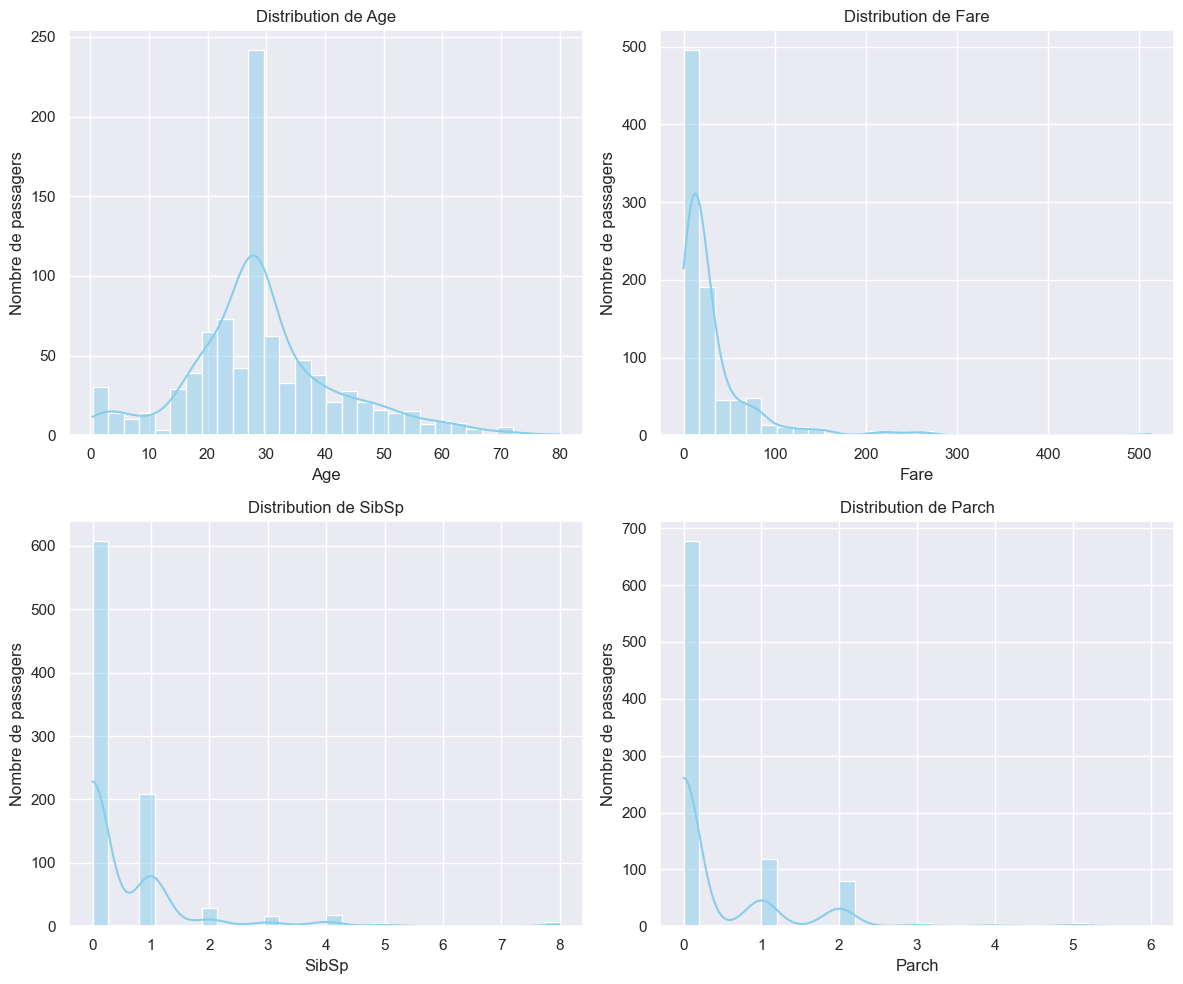

In [26]:
# Liste des colonnes numériques
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Création des histogrammes avec KDE
plt.figure(figsize=(12,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(titanic_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre de passagers")
    
plt.tight_layout()
plt.show()


**Analyse:**  
  
**Age :**  
- Distribution : Centrée principalement sur les adultes âgés de 20 à 40 ans, avec une présence notable d’enfants plus jeunes.   
- À explorer : Les enfants ont-ils eu un meilleur taux de survie (Règle du "women and children first") ?
   
**Fare (Prix du billet) :**  
- Distribution : Fortement asymétrique à droite avec de nombreux billets à bas prix et quelques billets très coûteux (outliers).  
- À explorer : Les billets plus chers ont-ils donné un avantage en survie ?
  
**SibSp (Frères/Sœurs, Époux(ses) à bord) :**  
- Distribution : La majorité des passagers voyageaient seuls (0), avec quelques passagers accompagnés de frères/sœurs ou conjoints.  
- À explorer : Voyager seul réduisait-il les chances de survie ?
  
**Parch (Parents/Enfants à bord) :**  
- Distribution : La plupart des passagers n’avaient aucun parent ou enfant à bord.  
- À explorer : Les familles complètes ont-elles eu un meilleur taux de survie ?



---


  
Maintenant que l'analyse univariée est effectuée, nous pouvons passer à l'**analyse bivariée** 

    
C'est à dire, étudier les relations entre les variables.  
1 - On commencera par étudier les relations entre les **variables catégorielles et Survived**  
2 - Puis nous étudirons les relations entre les **variables numériques et Survived**

# **3- Analyse Bivariée**
  

### **Relations entre les variables catégorielles et Survived**  
*(Barplot ou Countplot)*

**Countplot : Sex vs Survived**

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


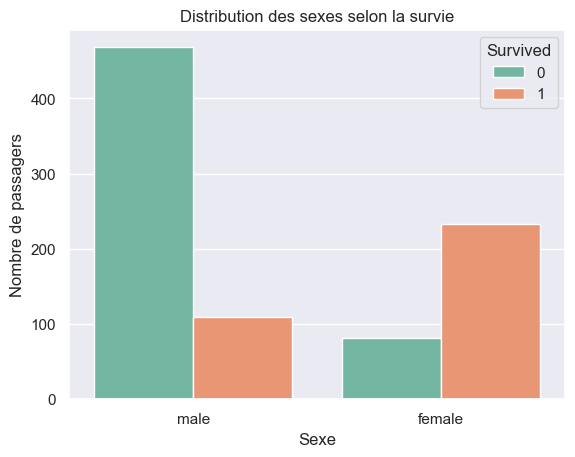

In [32]:
#Calcul du taux de survie par sexe en %
survival_rates = titanic_df.groupby('Sex')['Survived'].mean()*100
print(survival_rates)

#Countplot : Sex vs Survived
sns.countplot(data=titanic_df, x='Sex', hue='Survived', palette='Set2', legend=True)
plt.title("Distribution des sexes selon la survie")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")

plt.show()

**Analyse:**  
  
**Observation :**  
- Survivant (1):  
  - Grande majorité de femme (environ 230 femmes contre 80 hommes) 
- Non survivant (0):  
  - Grande majorité d'homme (environ 40 hommes contre 110 femmes) 

**Insight potentiel:**  
Environ 74% des femmes ont survécu, contre seulement 19% des hommes.  
Ce résultat montre que la règle "women and children first" semble avoir été appliquée principalement aux femmes, plutôt qu’aux enfants.  
Les données indiquent que le sexe était un facteur beaucoup plus influent que l’âge sur les chances de survie. 


.  
  
**Barplot: Pclass vs Survived**

Nombre de personne par pclass
 Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Survival rate / pclass
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


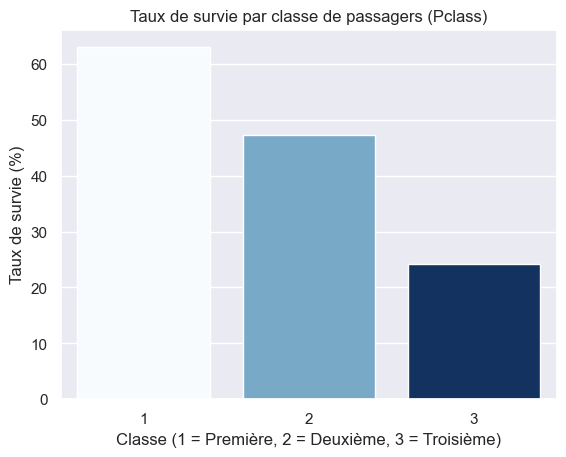

In [35]:
# Compter le nombre de passagers par Pclass
pclass_counts = titanic_df['Pclass'].value_counts().sort_index()
print("Nombre de personne par pclass\n",pclass_counts)
# Calcul du taux de survie par Pclass
survival_rate_pclass = titanic_df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival rate / pclass\n",survival_rate_pclass)

# Barplot des taux de survie par Pclass
sns.barplot(x=survival_rate_pclass.index, y=survival_rate_pclass.values, hue=survival_rate_pclass.index, palette='Blues', legend=False)
plt.title("Taux de survie par classe de passagers (Pclass)")
plt.xlabel("Classe (1 = Première, 2 = Deuxième, 3 = Troisième)")
plt.ylabel("Taux de survie (%)")

plt.show()

**Analyse:**  
  
**Observation :**  
On constate une corrélation forte entre la classe du billet (Pclass) et le taux de survie :  
- 1ère classe : ~62% de taux de survie.  
- 2ème classe : ~47% de taux de survie.  
- 3ème classe : ~24% de taux de survie.  
La tendance montre que plus la classe est élevée, plus les chances de survie augmentent.  
  
**Insight potentiel :**  
La classe du billet a été un facteur déterminant pour la survie.  
Cela peut refléter :  
- Un meilleur accès aux canots de sauvetage pour les passagers de 1ère classe.  
- Des différences socio-économiques où les classes supérieures ont pu bénéficier de privilèges lors de l'évacuation.  

Ce facteur pourrait être lié à d’autres variables comme le **prix du billet (Fare)** ou **l’emplacement des cabines**.  


.  
  
**Barplot: Embarked vs Survived**

Nombre de personne par Embarked
 Embarked
C    168
Q     77
S    646
Name: count, dtype: int64

Survival rate / Embarked
 Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


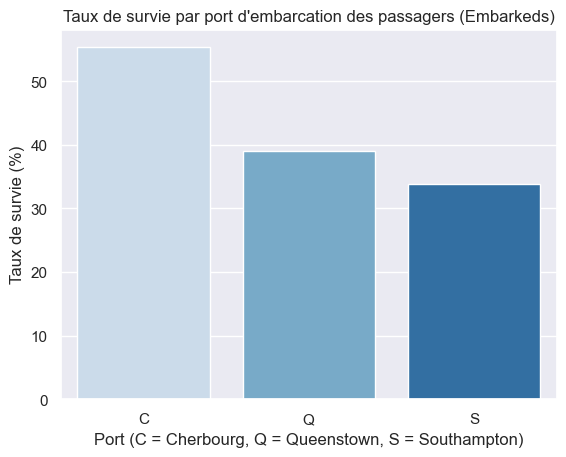

In [38]:
# Compter le nombre de passagers par Embarked
embarked_counts = titanic_df['Embarked'].value_counts().sort_index()
print("Nombre de personne par Embarked\n",embarked_counts)
# Calcul du taux de survie par Embarked
survival_rate_embarked = titanic_df.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival rate / Embarked\n",survival_rate_embarked)

# Barplot des taux de survie par Embarked
sns.barplot(x=survival_rate_embarked.index, y=survival_rate_embarked.values, hue=survival_rate_embarked.index, palette='Blues', legend=False)
plt.title("Taux de survie par port d'embarcation des passagers (Embarkeds)")
plt.xlabel("Port (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Taux de survie (%)")

plt.show()

**Analyse:**  
  
**Observation :**  
On constate une corrélation certaine entre le port d'embarcation (Embarked) et le taux de survie :  
- Cherbourg : ~55% de taux de survie.  
- Queenstown: ~38% de taux de survie.  
- Southampton : ~33% de taux de survie.    
  
**Insight potentiel :**  
Le port d'embarcation peut être un facteur determinant pour la survie. 
Cela peut refléter :  
- Des différences socio-économiques où les personnes ayant embarquées à Cherbourg ont pu bénéficier de privilèges lors de l'évacuation.     

Les passagers ayant embarqué à Cherbourg pourraient être majoritairement en Première Classe avec des billets plus chers, expliquant leur taux de survie plus élevé. 


.  
  
**Countplot: Has_Cabin vs Survived**

Has_Cabin
0    29.985444
1    66.666667
Name: Survived, dtype: float64


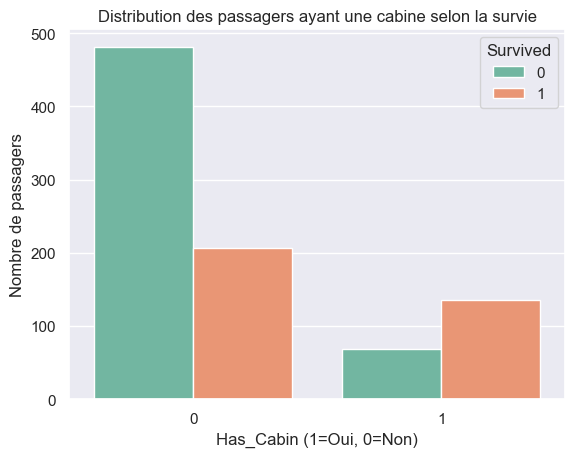

In [41]:
#Calcul du taux de survie en fonction de Has_cabin en %
survival_rates_hascabin = titanic_df.groupby('Has_Cabin')['Survived'].mean()*100
print(survival_rates_hascabin)

#Countplot : Has_Cabin vs Survives
sns.countplot(data=titanic_df, x='Has_Cabin', hue='Survived', palette='Set2', legend=True)
plt.title("Distribution des passagers ayant une cabine selon la survie")
plt.xlabel("Has_Cabin (1=Oui, 0=Non)")
plt.ylabel("Nombre de passagers")

plt.show()

**Analyse:**  
  
**Observation :**  
- Survivant (1):  
  - Bien que plus de personnes sans cabine aient survécu, elles ne représentent pas la majorité des personnes sans cabine (seulement 29%), pour les personnes ayant une cabine, la majorité d'entre elles ont survécu (66%).  
- Non survivant (0):  
  - La grande majorité des personnes n'ayant pas survécu n'avait pas de cabine (env. 570 contre moins de 100)

**Insight potentiel:**  
Environ 66% des personnes ayant des cabines ont survécu contre 29% des personnes sans cabine.  
Ce résultat montre que la détention d'une cabine est un facteur déterminant pour le taux de survie.  
Les cabines pourraient avoir été attribuées en priorité aux classes supérieures et aux femmes, expliquant en partie les taux de survie plus élevés.  
  

.  

  .  
### **Relations entre les variables numériques et Survived**  
*(Boxplot ou Violinplot --> Pour les variables numériques continues)*  
*(Barplot --> Pour les variables numériques discrètes)*

.  
  
**Boxplot: Age vs Survived**

Age_Group
Enfants (≤10 ans)            59.375000
Adolescents (11-17 ans)      42.666667
Adultes (18-50 ans)          36.337209
Seniors (51-59 ans)          40.476190
Personnes âgées (≥60 ans)    22.727273
Name: Survived, dtype: float64


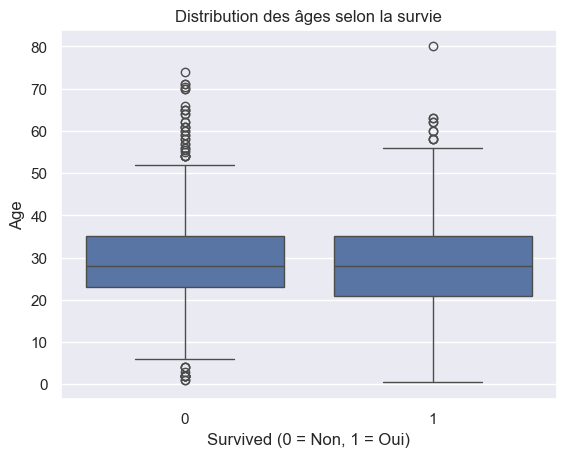

In [45]:
# Définition des groupes d'âge
bins = [0, 10, 18, 50, 60, 100]  # Tranches d'âge (ajustables si nécessaire)
labels = ['Enfants (≤10 ans)', 'Adolescents (11-17 ans)', 'Adultes (18-50 ans)', 'Seniors (51-59 ans)', 'Personnes âgées (≥60 ans)']

# Création d'une nouvelle colonne catégorisant l'âge
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=True)

# Calcul du taux de survie pour chaque groupe d'âge en spécifiant `observed=False`
survival_rates_by_age = titanic_df.groupby('Age_Group', observed=False)['Survived'].mean() * 100

# Affichage des résultats
print(survival_rates_by_age)


sns.boxplot(data=titanic_df, x='Survived', y='Age')
plt.title("Distribution des âges selon la survie")
plt.xlabel("Survived (0 = Non, 1 = Oui)")
plt.ylabel("Age")

plt.show()

**Analyse :**  

**Observation :**  
Le boxplot montre que les médianes d’âge sont relativement proches pour les survivants (1) et les non-survivants (0), avec une valeur médiane d’environ **28 ans** dans les deux groupes.  

- **Survivants (1) :**  
  - Une proportion plus élevée d’enfants est présente parmi les survivants, confirmant une certaine application de la règle *"women and children first"*.  
  - L'âge maximum parmi les survivants est plus faible, suggérant que les personnes très âgées ont eu moins de chances de survie.  

- **Non-survivants (0) :**  
  - Moins d’enfants présents, ce qui renforce l’idée que l’âge a eu un effet, mais probablement en interaction avec d’autres facteurs.  
  - Les passagers âgés (≥60 ans) sont plus nombreux parmi les non-survivants, avec la présence marquée d’outliers (jusqu’à 80 ans).  

**Complément avec les taux de survie par tranche d'âge :**  
- **Enfants (≤10 ans) :** **~59.4%** de survie, confirmant un avantage important.  
- **Adolescents (11-17 ans) :** **~42.7%**, un taux plus faible que les enfants, mais toujours au-dessus de la moyenne générale.  
- **Adultes (18-50 ans) :** **~36.3%**, soit un taux de survie inférieur à celui des plus jeunes.  
- **Seniors (51-59 ans) :** **~40.5%**, légèrement supérieur aux adultes, bien que la différence ne soit pas significative.  
- **Personnes âgées (≥60 ans) :** **~22.7%**, confirmant que l'âge avancé était un facteur défavorable à la survie.  

**Insight potentiel :**  
- L’effet de l’âge sur la survie est **non linéaire** :  
  - **Les enfants** ont eu un avantage marqué, probablement dû à la priorité donnée lors de l’évacuation.  
  - **Les adolescents et adultes** ont eu un taux de survie intermédiaire, proche de la moyenne générale.  
  - **Les personnes âgées** ont eu les chances de survie les plus faibles.  

Cependant, **l'âge seul ne suffit pas à expliquer ces différences**, et d’autres facteurs comme le sexe et la classe doivent être pris en compte pour une analyse plus approfondie.

.  
  
**Violin plot: Fare vs Survived**

Moyenne du prix du billet des survivants : 48.40
Moyenne du prix du billet des non-survivants : 22.12


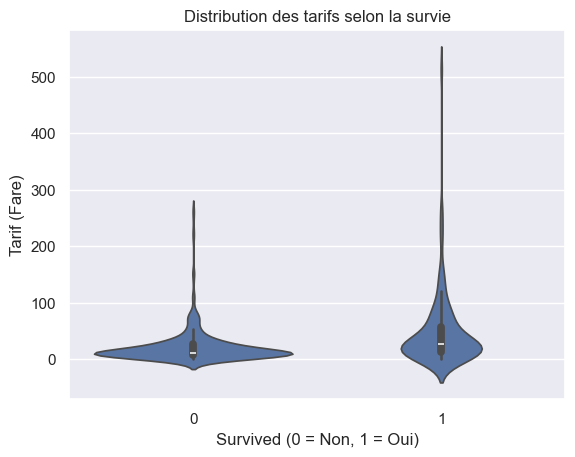

In [48]:
# Calcul de la moyenne du prix du billet pour les survivants et non-survivants
mean_fare_survived = titanic_df[titanic_df['Survived'] == 1]['Fare'].mean()
mean_fare_not_survived = titanic_df[titanic_df['Survived'] == 0]['Fare'].mean()

print(f"Moyenne du prix du billet des survivants : {mean_fare_survived:.2f}")
print(f"Moyenne du prix du billet des non-survivants : {mean_fare_not_survived:.2f}")

# Violinplot : Fare vs Survived (variable numérique continue)
sns.violinplot(data=titanic_df, x='Survived', y='Fare')
plt.title("Distribution des tarifs selon la survie")
plt.xlabel("Survived (0 = Non, 1 = Oui)")
plt.ylabel("Tarif (Fare)")

plt.show()

**Analyse:**  
  
**Observations :**  
- **Non-survivants (0) :**  
  - La majorité des passagers décédés avaient des billets coûtant moins de **50 unités**.  
  - Très peu de passagers avec des billets chers (**>100 unités**) n'ont pas survécu.  
  - La médiane du prix du billet est relativement basse pour ce groupe.  
  - **Moyenne du prix du billet des non-survivants :** ~**22.12**
- **Survivants (1) :**  
  - La répartition des tarifs est plus large et plus dispersée que chez les non-survivants.  
  - Une proportion importante de survivants a payé des billets plus élevés, certains dépassant **500 unités**.  
  - La médiane du prix des billets est plus haute que celle des non-survivants.  
  - **Moyenne du prix du billet des survivants :** ~**48.40**  


**Insight potentiels :**  
Ces résultats confirment que **le prix du billet était un facteur influençant la survie**.  
Les passagers ayant payé des billets plus chers **avaient significativement plus de chances de survivre**.  
Ce facteur est probablement **fortement corrélé à la classe (Pclass)** — les passagers de **1ère classe**, qui payaient des tarifs plus élevés, ont bénéficié d’un meilleur accès aux canots de sauvetage.








.  
  
**Barplot: SibSp vs Survived**

Nombre de SibSp
 SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

Survival rate / SibSp
 SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64


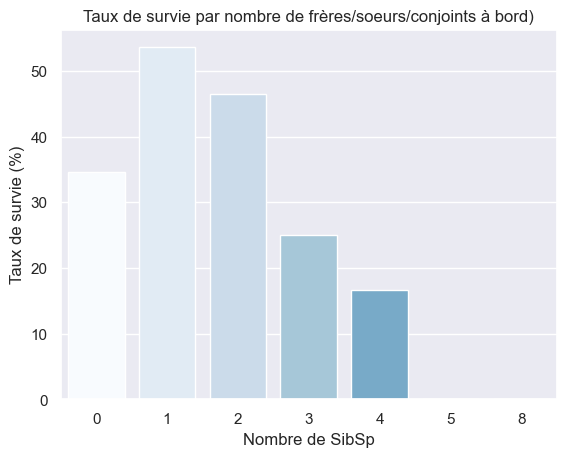

In [51]:
# Compter le nombre de SibSp
SibSp_counts = titanic_df['SibSp'].value_counts().sort_index()
print("Nombre de SibSp\n",SibSp_counts)
# Calcul du taux de survie par SibSp
survival_rate_SibSp = titanic_df.groupby('SibSp')['Survived'].mean() * 100
print("\nSurvival rate / SibSp\n",survival_rate_SibSp)

# Barplot des taux de survie par SibSp
sns.barplot(x=survival_rate_SibSp.index, y=survival_rate_SibSp.values, hue=survival_rate_SibSp.index, palette='Blues', legend=False)
plt.title("Taux de survie par nombre de frères/soeurs/conjoints à bord)")
plt.xlabel("Nombre de SibSp")
plt.ylabel("Taux de survie (%)")

plt.show()

**Analyse:**  
  
**Observation :**  
Les passagers voyageant seuls (SibSp = 0) avaient un taux de survie d’environ 34%.  
Les passagers voyageant avec 1 ou 2 frères/sœurs/conjoints avaient un meilleur taux de survie (~54% et ~46% respectivement).  
Lorsque le nombre de compagnons augmente à 3 ou plus, le taux de survie chute fortement à 25%, 16%, et même 0% pour 5 et 8 compagnons.  
  
**Insight Potentiel :**    
Voyager seul semble moins avantageux que d’être accompagné d’un petit groupe familial (1-2 personnes).  
Les grands groupes familiaux (>3) ont eu moins de chances de survie, peut-être à cause de la difficulté à rester ensemble lors de l’évacuation ou des contraintes liées aux embarcations limitées.  
  
Il existe un lien non-linéaire entre le nombre de compagnons et la survie.  
Les petits groupes familiaux (1-2 personnes) avaient un avantage, tandis que les grands groupes faisaient face à plus de difficultés.  

.  
  
**Barplot:  Parch vs Survived**

Nombre de Sparch
 Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

Survival rate / Parch
 Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64


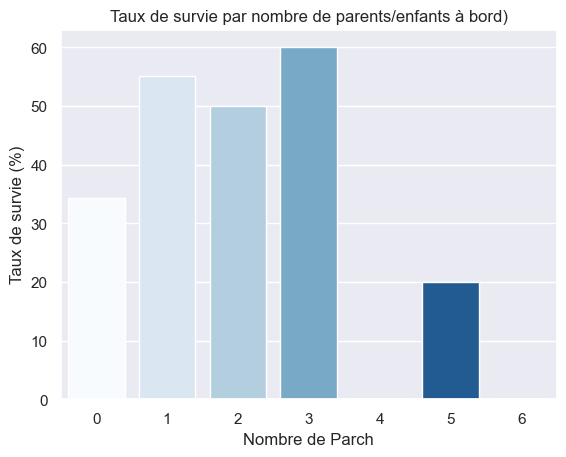

In [54]:
# Compter le nombre de Parch
Parch_counts = titanic_df['Parch'].value_counts().sort_index()
print("Nombre de Sparch\n",Parch_counts)
# Calcul du taux de survie par Parch
survival_rate_Parch = titanic_df.groupby('Parch')['Survived'].mean() * 100
print("\nSurvival rate / Parch\n",survival_rate_Parch)

# Barplot des taux de survie par Parch
sns.barplot(x=survival_rate_Parch.index, y=survival_rate_Parch.values, hue=survival_rate_Parch.index, palette='Blues', legend=False)
plt.title("Taux de survie par nombre de parents/enfants à bord)")
plt.xlabel("Nombre de Parch")
plt.ylabel("Taux de survie (%)")

plt.show()

**Analyse:**  
  
**Observation :**  
Les passagers sans parents/enfants à bord (Parch = 0) ont un taux de survie d’environ 34%, similaire à ceux voyageant seuls dans SibSp.  
Le taux de survie augmente pour ceux accompagnés de 1 à 3 parents/enfants :  
- Parch = 1 : 55%  
- Parch = 2 : 50%  
- Parch = 3 : 60% (attention au faible nombre d’observations ici)  
- Parch ≥ 4, le taux de survie chute brutalement (0% pour 4 et 6, 20% pour 5).   
   
**Insight Potentiel :**    
Les familles modérées (1-3 parents/enfants) ont eu de meilleures chances de survie.  
Les familles très nombreuses ont probablement eu plus de difficultés à se déplacer ensemble ou à accéder aux canots de sauvetage.  

Les passagers accompagnés de proches (parents/enfants) ont eu un meilleur taux de survie, en particulier dans les petits groupes.  
Les grands groupes familiaux semblent défavorisés pour les mêmes raisons que pour SibSp.  

.
  
**Analyse des résultats de SibSp et Parch:**
  
Nous voyons que pour SibSp comme pour Parch :  
La taille du groupe familial est un facteur déterminant pour la survie.  
**Petits groupes (1-3) → Avantage.  
Grands groupes (>3) → Désavantage significatif**.  
.  
.  
Voyons si en créant une nouvelle variable ***FamilySize = SibSp + Parch + 1***  
où FamilySize représente la taille totale de la famille à bord, permettrait de simplifier l'analyse en effectuant **FamilySize vs Survived**.

In [57]:
#Création de la nouvelle colonne FamilySize
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
print("La colonne FamilySize a été créée") 

La colonne FamilySize a été créée


.  
  
**Barplot: FamilySize vs Survived**

Nombre de FamilySize
 FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

Survival rate / FamilySize
 FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


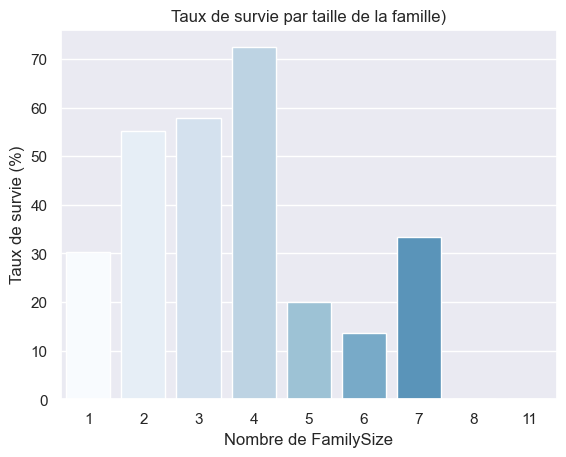

In [59]:
# Compter le nombre de FamilySize
FamilySize_counts = titanic_df['FamilySize'].value_counts().sort_index()
print("Nombre de FamilySize\n",FamilySize_counts)
# Calcul du taux de survie par FamilySize
survival_rate_FamilySize = titanic_df.groupby('FamilySize')['Survived'].mean() * 100
print("\nSurvival rate / FamilySize\n",survival_rate_FamilySize)

# Barplot des taux de survie par FamilySize
sns.barplot(x=survival_rate_FamilySize.index, y=survival_rate_FamilySize.values, hue=survival_rate_FamilySize.index, palette='Blues', legend=False)
plt.title("Taux de survie par taille de la famille)")
plt.xlabel("Nombre de FamilySize")
plt.ylabel("Taux de survie (%)")

plt.show()

**Analyse:**  
  
**Observation:**  
- ***Passagers seuls (FamilySize = 1)***  
  - Taux de survie faible (~30%).  
  - *Hypothèse* : Ces passagers n’avaient pas d’aide ou de soutien pendant l’évacuation.  
  - Cela rejoint l’idée que voyager seul pouvait être un désavantage.  
- ***Petites familles (2-4 membres)***  
  - Meilleurs taux de survie (55% à 72%).  
  - *Hypothèse* : Les familles modérées ont pu s’entraider efficacement et accéder plus facilement aux canots de sauvetage.  
  - Cela pourrait également refléter une proportion plus élevée de femmes et d’enfants dans ces groupes.
- ***Grandes familles (≥5 membres)***  
  - Forte chute du taux de survie (~0-20%).  
  - *Hypothèse* :  
    - Difficulté à évacuer ensemble rapidement.  
    - Séparation possible pendant l’évacuation.  
    - Facteurs socio-économiques : ces familles étaient peut-être dans les ponts inférieurs avec moins d'accès aux canots.  

**Insight potentiel :**  
Il existe une corrélation non linéaire entre la taille de la famille et la survie.   
- Voyager en petite famille (2-4) offrait un avantage significatif.  
- Être seul ou en grande famille réduisait les chances de survie.  

---

# **4- Analyse Multivariée**

## **Synthèse des Pistes à Explorer en Analyse Multivariée**  

À partir des observations faites lors de l'analyse bivariée, plusieurs tendances et corrélations ont émergé. Afin d’approfondir ces résultats et d’évaluer l’influence combinée de plusieurs variables sur la survie des passagers du Titanic, nous allons explorer les pistes suivantes en analyse multivariée.


### **1 - Interactions entre les caractéristiques sociodémographiques et la survie**  
- **Sexe + Age → Survived** : L’avantage des femmes en termes de survie s’applique-t-il aussi aux jeunes filles ? Les garçons ont-ils eu un désavantage ?  
- **Sexe + Pclass → Survived** : Une femme en 3ème classe avait-elle plus de chances qu’un homme en 1ère classe ?  
- **Sexe + Has_Cabin → Survived** : Les femmes avaient-elles plus souvent accès aux cabines, ce qui aurait amélioré leurs chances de survie ?  
### **2 - Influence de la classe et du prix du billet**  
- **Pclass + Fare → Survived** : Au sein d’une même classe, le prix du billet jouait-il un rôle sur la survie ?  
- **Pclass + Has_Cabin → Survived** : Les passagers de 1ère classe avaient-ils plus souvent une cabine, et cela influençait-il leur survie ?  
- **Fare + Has_Cabin → Survived** : Les billets les plus chers donnaient-ils automatiquement accès à une cabine ?  
### **3 - Impact des ports d’embarquement**  
- **Embarked + Pclass → Survived** : Les passagers de Cherbourg étaient-ils majoritairement en 1ère classe ?  
- **Embarked + Sex → Survived** : Les ports d’embarquement influencent-ils la proportion de femmes/hommes ?  
- **Embarked + Fare → Survived** : Le prix moyen des billets diffère-t-il selon le port ?  
### **4 - Structure familiale et classe**  
- **FamilySize + Pclass → Survived** : Les grandes familles étaient-elles concentrées en 3ème classe ?  
- **FamilySize + Sex → Survived** : Les femmes voyageaient-elles plus souvent en petites familles ?  
- **FamilySize + Fare → Survived** : Les grandes familles avaient-elles des billets moins chers ?  
### **5 - Autres corrélations entre l’âge, le prix et la classe**  
- **Age + Pclass → Survived** : Les enfants de 3ème classe ont-ils survécu autant que ceux de 1ère classe ?  
- **Age + Fare → Survived** : Les passagers plus âgés payaient-ils des billets plus chers ?  
### **6 - Facteurs liés aux cabines**  
- **Has_Cabin + Pclass + Sex → Survived**: Les femmes de première classe avaient-elles presque systématiquement des cabines et comment cela a influencé leur survie.
- **Has_Cabin + Fare → Survived** : Le prix du billet influençait-il l’accès aux cabines ?  
- **Has_Cabin + Fare + Embarked → Survived** : Les passagers ayant payé les billets les plus chers et embarquant à Cherbourg avaient-ils  plus souvent des cabines, et cela influençait-il sur leur survie ?


Ces analyses permettront d’identifier plus précisément les facteurs les plus déterminants dans la survie des passagers. Nous allons maintenant explorer ces relations à travers des visualisations et des analyses statistiques.



### **1 - Interactions entre les caractéristiques sociodémographiques et la survie**  

.  
  
**Violinplot: Sexe + Age → Survived**

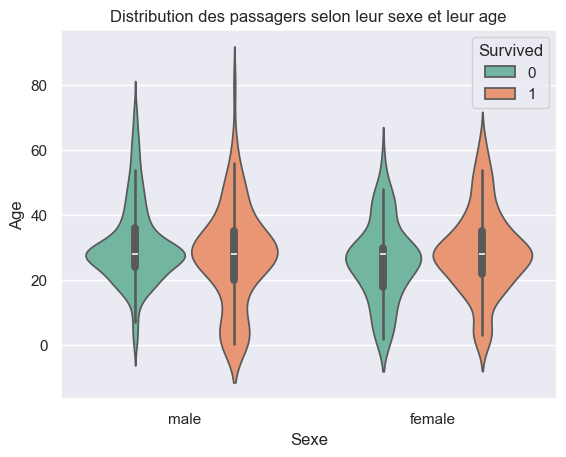

In [64]:
#Violinplot Sexe + Age → Survived
sns.violinplot(data=titanic_df, x='Sex', y='Age',hue='Survived', palette='Set2', legend=True)
plt.title("Distribution des passagers selon leur sexe et leur age")
plt.xlabel("Sexe")
plt.ylabel("Age")

plt.show()

> ⚠️ ***Note :**
Le violon peut s'étendre légèrement sous 0 en raison du lissage KDE, mais aucune valeur négative n'est présente dans les données.ù*

**Analyse:**  
  
**Objectif :**
Explorer si l’âge influençait la survie différemment selon le sexe, et vérifier si les filles avaient eu plus de chances que les garçons.  
  
**Observation:**  
- ***Femmes:***  
Les survivantes couvrent une large gamme d’âges, avec une densité élevée entre 20 et 40 ans.  
Les filles (0-12 ans) ont aussi une proportion notable de survie.  
Peu de femmes âgées (au-delà de 60 ans) ont survécu.  
- ***Hommes:***  
Très peu d’enfants garçons ont survécu, contrairement aux filles.  
Les hommes survivants sont majoritairement jeunes adultes (~20-40 ans), mais en nombre bien plus restreint que les femmes.  
La majorité des hommes n’a pas survécu (partie verte plus dense).  
  
**Insights potentiels:**
Le graphique confirme la règle du "women and children first", mais avec une nuance :  
- Les filles ont eu plus de chances de survie que les garçons.   
- Les femmes adultes (20-40 ans) étaient également prioritaires.  
- Les hommes, quel que soit l’âge, avaient de faibles chances de survie.  

.  
  
**Countplot: Sexe + Pclass → Survived**

Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64


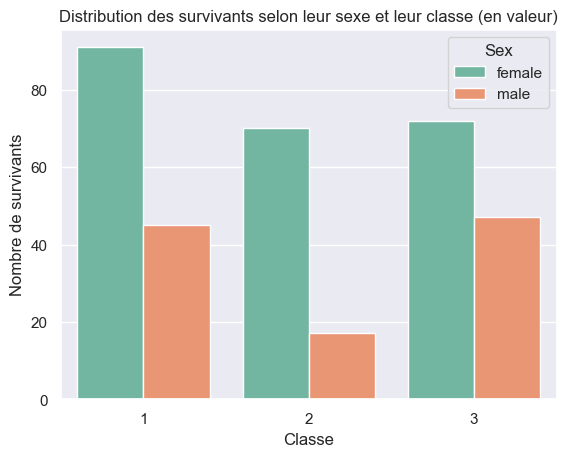

In [68]:
#Calcul du taux de survie par sexe et par classe (Pclass) en %
survival_rates_sex_class = titanic_df.groupby(['Pclass','Sex'])['Survived'].mean()*100
print(survival_rates_sex_class)

#Countplot Sexe + Pclass → Survived
sns.countplot(data=titanic_df[titanic_df['Survived']==1], x='Pclass', hue='Sex', palette='Set2', legend=True)
plt.title("Distribution des survivants selon leur sexe et leur classe (en valeur)")
plt.xlabel("Classe")
plt.ylabel("Nombre de survivants")

plt.show()

**Analyse:**  
  
**Objectif :**  
Vérifier si les femmes de 3ème classe avaient autant de chances de survie que les hommes de 1ère classe.  
  
**Observation :**  
- ***Femmes :***  
Les femmes, quel que soit leur classe, avaient systématiquement plus de chances de survie que les hommes.  
50% des femmes en 3ème classe ont survécu, contre seulement 36% des hommes en 1ère classe.  
- ***Hommes :***  
Le taux de survie des hommes diminue fortement avec la classe :  
  - 1ère classe : 36.9%  
  - 2ème classe : 15.7%  
  - 3ème classe : 13.5%  
- ***Classe :***  
Bien que le sexe soit un facteur majeur, la classe influence également la survie :  
  -  Les femmes en 1ère classe bénéficiaient du meilleur taux de survie (96.8%).  
  - Les hommes de 3ème classe avaient le taux le plus bas (13.5%).  
  
**Insight potentiel :**  
Cette analyse confirme que ***la règle du "women and children first" a clairement bénéficié aux femmes, peu importe leur classe***.  
Toutefois, ***la classe restait un facteur d’influence*** : même si une femme de 3ème classe avait plus de chances de survie qu’un homme de 1ère classe, les passagers des classes supérieures bénéficiaient globalement de meilleures chances.  


.  
  
**Countplot: Sexe + Has_Cabin → Survived**

Has_Cabin  Sex   
0          female    65.437788
           male      13.617021
1          female    93.814433
           male      42.056075
Name: Survived, dtype: float64


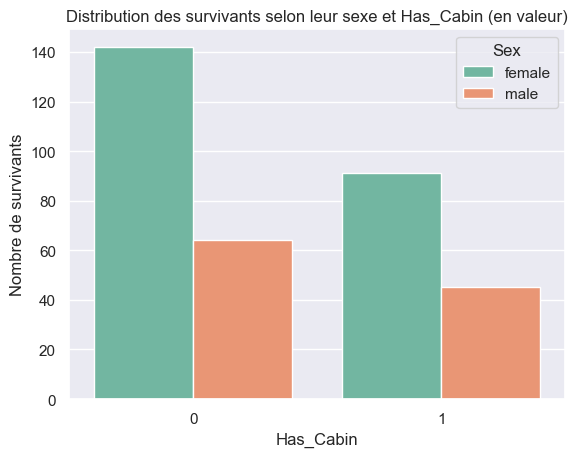

In [71]:
#Calcul du taux de survie par sexe et par Has_Cabin en %
survival_rates_Has_Cabin_Sex = titanic_df.groupby(['Has_Cabin','Sex'])['Survived'].mean()*100
print(survival_rates_Has_Cabin_Sex)

#Countplot Sexe + Has_Cabin → Survived
sns.countplot(data=titanic_df[titanic_df['Survived']==1], x='Has_Cabin', hue='Sex', palette='Set2', legend=True)
plt.title("Distribution des survivants selon leur sexe et Has_Cabin (en valeur)")
plt.xlabel("Has_Cabin")
plt.ylabel("Nombre de survivants")

plt.show()

**Analyse:**  
  
**Objectif** :  
Vérifier si les femmes étaient plus susceptibles d’avoir une cabine assignée, augmentant ainsi leurs chances de survie.  
  
**Observation** :
- ***Femmes*** :  
Les femmes ont survécu en grand nombre, qu'elles aient eu une cabine ou non.  
  - Sans cabine : ~65% de survie.  
  - Avec cabine : ~94% de survie.  
Le fait d’avoir une cabine a considérablement augmenté les chances de survie des femmes (+30%).  
.  
- ***Hommes*** :  
Le taux de survie des hommes reste plus faible que celui des femmes, mais la présence d’une cabine améliore leurs chances :  
  - Sans cabine : ~13.6% de survie.  
  - Avec cabine : ~42% de survie.  
Les hommes sans cabine ont eu un taux de survie extrêmement bas, confirmant l'importance de la cabine comme facteur protecteur.  
.  
- ***Cabines*** :  
La présence d'une cabine améliore significativement le taux de survie, peu importe le sexe.  
Les femmes avec cabine affichent le meilleur taux (\~94%), tandis que les hommes sans cabine ont le plus faible (\~13.6%).  
  
**Insight potentiel** :  
Cette analyse confirme que le fait d’avoir une cabine a joué un rôle crucial dans les chances de survie, en particulier pour les hommes.  
Les femmes bénéficiaient déjà d’un avantage lié à la règle du "women and children first", mais l’ajout d’une cabine augmentait encore leurs chances.  
Pour les hommes, avoir une cabine multipliait par 3 leurs chances de survie (~13% → ~42%), bien que cela restait inférieur aux femmes.  

### **2 - Influence de la classe et du prix du billet**

.  
  
**Boxplot: Pclass + Fare → Survived**

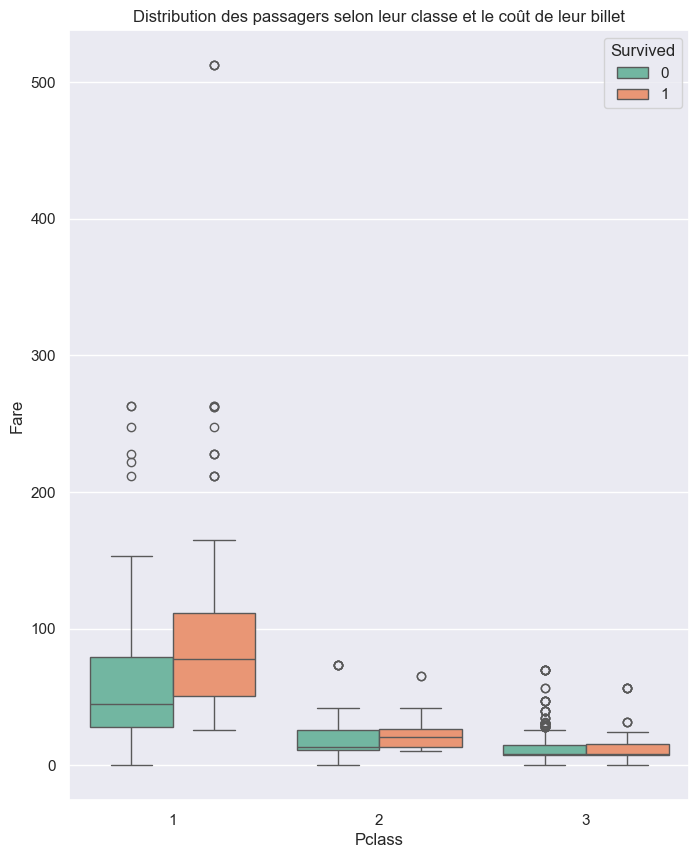

In [75]:
plt.figure(figsize=(8,10))
sns.boxplot(data=titanic_df, x='Pclass', y='Fare', hue='Survived', palette='Set2', legend=True)
plt.title("Distribution des passagers selon leur classe et le coût de leur billet")
plt.xlabel("Pclass")
plt.ylabel("Fare")

plt.show()

**Analyse:**  
  
**Objectif** :  
Vérifier si, au sein d’une même classe, le prix du billet influençait les chances de survie.  
  
**Observation** :  
- ***1ère classe*** :  
Les passagers ayant survécu ont payé des billets en moyenne plus chers.  
La médiane des billets des survivants est plus élevée que celle des non-survivants.   
- ***2ème classe*** :  
Les différences entre survivants et non-survivants sont moins marquées.  
Les médianes des prix sont proches, mais les survivants ont légèrement payé plus.  
Peu d’outliers sont présents.   
- ***3ème classe*** :  
Les passagers de 3ème classe ont payé les billets les moins chers.  
La différence de prix entre survivants et non-survivants est très faible.  
De nombreux outliers sont visibles pour les non-survivants, indiquant que certains passagers ont payé plus cher malgré leur faible classe.  
    
**Insights potentiels** :  
- ***Prix du billet = Facteur de survie important en 1ère classe*** : Les passagers ayant payé les billets les plus chers ont eu davantage de chances de survivre.  
- ***Peu d’influence dans les classes inférieures*** : En 2ème et 3ème classe, le prix du billet semble moins déterminant pour la survie.  
- ***Hypothèse*** : Le prix élevé des billets en 1ère classe pourrait être lié à des cabines mieux situées ou un accès plus direct aux canots de sauvetage.  

.  
  
**Countplot: Pclass + Has_Cabin → Survived**

Has_Cabin  Pclass
0          1         47.500000
           2         44.047619
           3         23.590814
1          1         66.477273
           2         81.250000
           3         50.000000
Name: Survived, dtype: float64


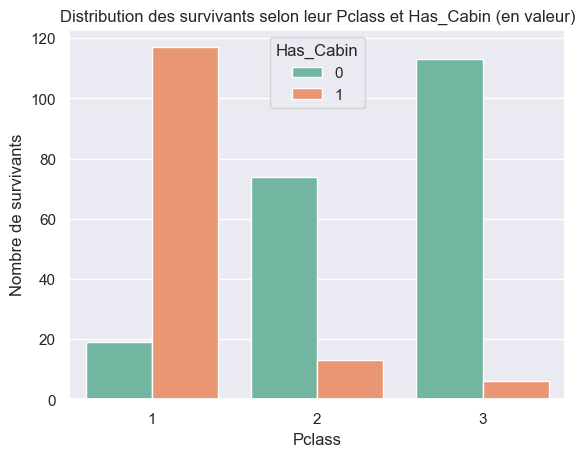

In [78]:
#Calcul du taux de survie par Pclass et par Has_Cabin en %
survival_rates_Pclass_Has_Cabin = titanic_df.groupby(['Has_Cabin','Pclass'])['Survived'].mean()*100
print(survival_rates_Pclass_Has_Cabin)

#Countplot Pclass + Has_Cabin → Survived 
sns.countplot(data=titanic_df[titanic_df['Survived']==1], x='Pclass', hue='Has_Cabin', palette='Set2', legend=True)
plt.title("Distribution des survivants selon leur Pclass et Has_Cabin (en valeur)")
plt.xlabel("Pclass")
plt.ylabel("Nombre de survivants")

plt.show()

**Analyse:**  
  
**Objectif** :  
Vérifier si les passagers de première classe avaient plus de chances d’avoir une cabine, améliorant ainsi leur survie.  
  
**Observation** :
- ***1ère classe:***  
La grande majorité des survivants avaient une cabine assignée (\~120 passagers avec cabine contre \~20 sans).  
- ***2ème classe:***  
La majorité des survivants n’avaient pas de cabine (\~70 sans cabine contre \~10 avec).  
- ***3ème classe:***  
Presque tous les survivants n’avaient pas de cabine (\~110 sans contre \~10 avec).  

- **Taux de survie par classe et présence de cabine**:
| Classe  | Sans Cabine (%) | Avec Cabine (%) |
|---------|-----------------|-----------------|
| 1ère    | 47.5%           | 66.5%           |
| 2ème    | 44.0%           | 81.3%           |
| 3ème    | 23.6%           | 50.0%           |
  
**Insights potentiels** :  
- ***Impact positif des cabines sur la survie :***  
Avoir une cabine augmentait clairement les chances de survie pour toutes les classes.  
Cet effet est particulièrement marqué en 2ème classe, où les passagers avec cabine avaient 81.3% de chances de survie, contre 44% sans.  
  
- ***Inégalités entre classes :***  
Les passagers de 1ère classe avaient beaucoup plus de chances d’avoir une cabine (et donc de meilleures chances de survie) que ceux des classes inférieures.  
En 3ème classe, seuls 10 survivants avaient une cabine, montrant un accès limité à ces ressources.  
  
- ***Accès privilégié aux canots :***  
Les passagers avec cabine, en particulier en 1ère et 2ème classes, ont probablement eu un accès facilité aux canots, expliquant leurs taux de survie plus élevés.  

- **Fare + Has_Cabin → Survived** : Les billets les plus chers donnaient-ils automatiquement accès à une cabine ?

.  
  
**Boxplot: Fare + Has_Cabin → Survived**

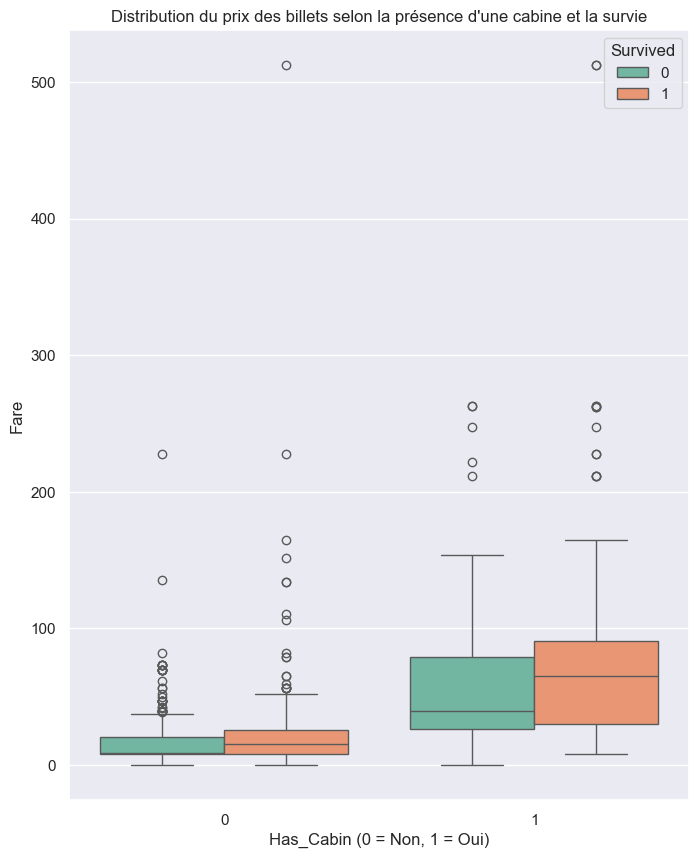

In [82]:
plt.figure(figsize=(8,10))
sns.boxplot(data=titanic_df, x='Has_Cabin', y='Fare', hue='Survived', palette='Set2', legend=True)
plt.title("Distribution du prix des billets selon la présence d'une cabine et la survie")
plt.xlabel("Has_Cabin (0 = Non, 1 = Oui)")
plt.ylabel("Fare")

plt.show()

**Analyse:**  
  
**Objectif**  
Vérifier si les passagers ayant payé les billets les plus chers avaient systématiquement une cabine et comment cela influençait leur survie.
  
**Observation**  
- **Passagers sans cabine (Has_Cabin = 0) :**  
  - Les billets sont généralement moins chers.  
  - Peu de différences notables entre survivants et non-survivants au niveau du prix payé.  
  - La majorité des billets coûte moins de **50 unités**.
- **Passagers avec cabine (Has_Cabin = 1) :**  
  - Les prix des billets sont plus élevés en moyenne, avec une médiane autour de **75 unités** pour les survivants.  
  - Les survivants ayant une cabine ont tendance à avoir payé légèrement plus cher que les non-survivants.  
  - Plus de billets coûteux (>200 unités) parmi les passagers ayant survécu avec une cabine.

**Insights potentiels**  
- **Lien clair entre prix élevé et présence de cabine :**  
  Les passagers ayant payé des billets plus chers étaient plus susceptibles d’avoir une cabine, augmentant leurs chances de survie.  
- **Les cabines comme "facteur protecteur" :**  
  Avoir une cabine a probablement facilité l'accès aux canots de sauvetage, ce qui se reflète dans les taux de survie plus élevés pour ces passagers.  
- **Effet amplifié par le prix :**  
  Parmi les passagers avec cabines, ceux ayant payé les billets les plus chers ont eu de meilleures chances de survie.

### **3 - Impact des ports d’embarquement**  

.  
  
**Countplot: Embarked + Pclass → Survived**

Pclass  Embarked
1       C           69.411765
        Q           50.000000
        S           58.914729
2       C           52.941176
        Q           66.666667
        S           46.341463
3       C           37.878788
        Q           37.500000
        S           18.980170
Name: Survived, dtype: float64


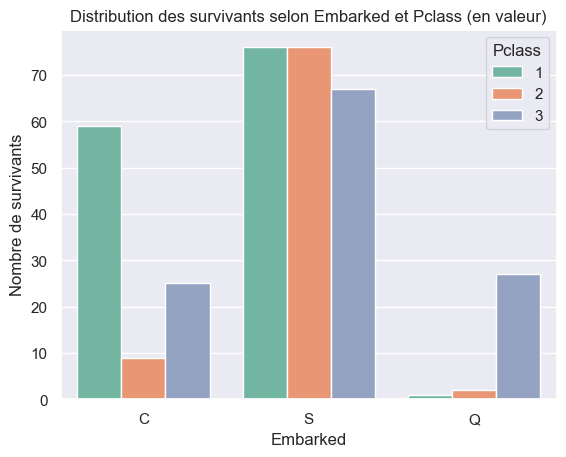

In [86]:
#Calcul du taux de survie par Embarked et par Pclass en %
survival_rates_Embarked_Pclass = titanic_df.groupby(['Pclass','Embarked'])['Survived'].mean()*100
print(survival_rates_Embarked_Pclass)

#Countplot Embarked + Pclass → Survived  
sns.countplot(data=titanic_df[titanic_df['Survived']==1], x='Embarked', hue='Pclass', palette='Set2', legend=True)
plt.title("Distribution des survivants selon Embarked et Pclass (en valeur)")
plt.xlabel("Embarked")
plt.ylabel("Nombre de survivants")

plt.show()

> ⚠️ ***Note d'interprétation:**  
Ce graphique affiche le nombre absolu de survivants par port d’embarquement et par classe. Il montre combien de passagers ont survécu dans chaque catégorie, mais ne reflète pas directement les taux de survie.  
Par exemple, un grand nombre de survivants en 2ème classe depuis Southampton peut apparaître, même si le taux de survie dans cette classe est inférieur à celui de la 1ère classe.*  
***Pour analyser les taux de survie (proportion de survivants par rapport au nombre total de passagers dans chaque groupe), il est préférable de se référer aux valeurs calculées séparément.***

**Analyse:**  
  
**Objectif**  
Vérifier si les passagers de certains ports (ex : Cherbourg) embarquaient majoritairement en 1ère classe, influençant leurs chances de survie.  
  
**Observation**  
- **Passagers embaqués à Cherbourg**
La majorité des survivants ayant embarqué à Cherbourg étaient en 1ère classe.  
En regardant les taux de survie par classe :  
  - 1ère classe : 69% de survie  
  - 2ème classe : 53%  
  - 3ème classe : 38%  
  - ***Conclusion*** :
    Cherbourg semble avoir embarqué un grand nombre de passagers privilégiés (1ère classe) bénéficiant de meilleures chances de survie.  

- **Passagers embaqués à Southampton**
Les survivants sont répartis équitablement entre 1ère et 2ème classe.  
Les taux de survie révèlent une hiérarchie claire :  
  - 1ère classe : 59%  
  - 2ème classe : 46%  
  - 3ème classe : 19%  
  - ***Remarque*** :
    La présence élevée de survivants en 2ème classe (sur le graphique) s’explique par un plus grand nombre de passagers embarqués dans cette classe depuis Southampton. 

- **Passagers embaqués à Queenstown**
La majorité des survivants provenaient de la 3ème classe, ce qui peut sembler contre-intuitif.  
En examinant les taux de survie :  
  - 2ème classe : 67% (taux de survie le plus élevé)  
  - 1ère classe : 50%  
  - 3ème classe : 38%  
  - ***Interprétation*** :
    La dominance des survivants en 3ème classe est probablement due au fait que la majorité des passagers ayant embarqué à Queenstown appartenaient à cette classe. 


**Insights potentiels**  
Le **port d’embarquement** a joué un rôle indirect dans les chances de survie via la répartition des classes.  
- **Cherbourg** a principalement embarqué des passagers plus aisés (1ère classe) bénéficiant de meilleures chances de survie.  
- **Southampton** avait une répartition plus équilibrée, mais les différences de survie sont restées marquées selon la classe.  
- **Queenstown**, point d’embarquement majoritaire pour la 3ème classe, montre que malgré un plus grand nombre de survivants en 3ème classe, le taux de survie y restait faible.

.  
  
**Countplot: Embarked + Sex → Survived**

Sex     Embarked
female  C           87.671233
        Q           75.000000
        S           69.268293
male    C           30.526316
        Q            7.317073
        S           17.460317
Name: Survived, dtype: float64


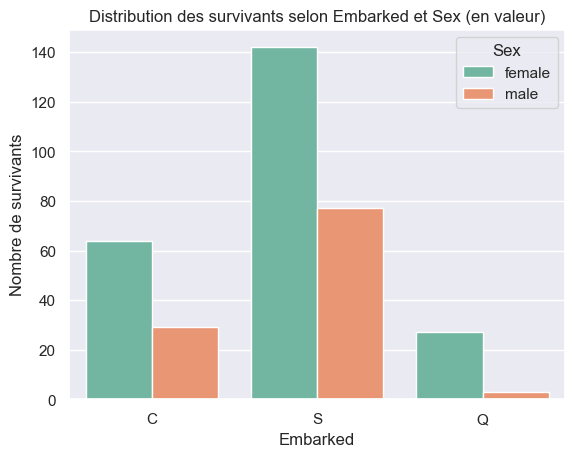

In [90]:
#Calcul du taux de survie par Embarked et par Sex en %
survival_rates_Embarked_Sex = titanic_df.groupby(['Sex','Embarked'])['Survived'].mean()*100
print(survival_rates_Embarked_Sex)

#Countplot Embarked + Sex → Survived  
sns.countplot(data=titanic_df[titanic_df['Survived']==1], x='Embarked', hue='Sex', palette='Set2', legend=True)
plt.title("Distribution des survivants selon Embarked et Sex (en valeur)")
plt.xlabel("Embarked")
plt.ylabel("Nombre de survivants")

plt.show()

> ⚠️ **Note :**  
Les pourcentages indiqués représentent les **taux de survie au sein de chaque sous-groupe** et non des répartitions globales. Par exemple, un taux de 87.7% pour les femmes embarquées à Cherbourg signifie que **87.7% des femmes ayant embarqué à C ont survécu**, et non que 87.7% des survivants de Cherbourg étaient des femmes.

**Analyse:**  
  
**Objectif**  
Vérifier si la répartition des survivants diffère selon le port d'embarquement et le sexe.

**Observation**  
**Taux de survie par port d'embarquement et sexe :**  
- **Cherbourg (C) :**  
  - Femmes : **87.7%** des femmes embarquées à Cherbourg ont survécu.  
  - Hommes : **30.5%** des hommes embarqués à Cherbourg ont survécu.  
- **Southampton (S) :**  
  - Femmes : **69.3%** des femmes ont survécu.  
  - Hommes : **17.5%** des hommes ont survécu.  
- **Queenstown (Q) :**  
  - Femmes : **75.0%** des femmes ont survécu.  
  - Hommes : **7.3%** des hommes ont survécu.  

**Insights potentiels**  
- Le port d'embarquement pourrait refléter des **différences socio-économiques** influençant les chances de survie.  
- Les passagers embarqués à Cherbourg semblent avoir bénéficié de meilleures conditions (peut-être liés à un plus grand nombre de passagers en 1ère classe).

.  
  
**Violinplot: Embarked + Fare → Survived**

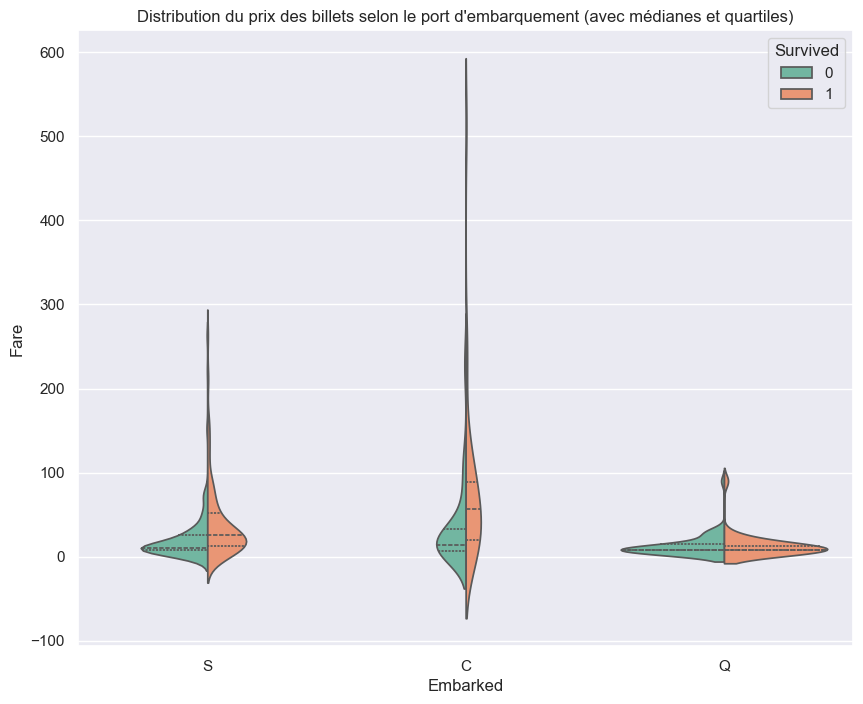

In [94]:
plt.figure(figsize=(10,8))
sns.violinplot(data=titanic_df, x='Embarked', y='Fare', hue='Survived', split=True, inner='quartile', palette='Set2')
plt.title("Distribution du prix des billets selon le port d'embarquement (avec médianes et quartiles)")
plt.xlabel("Embarked")
plt.ylabel("Fare")

plt.show()

**Analyse:**  
  
**Objectif**  
Analyser si le prix des billets variait selon le port d'embarquement et si cela influençait les chances de survie des passagers.

**Observation**  
- **Cherbourg (C) :**  
  - Les passagers embarquant à Cherbourg ont payé les tarifs les plus élevés (jusqu'à 500+), avec une forte concentration de survivants parmi ces billets coûteux.  
  - La médiane des survivants est nettement plus élevée que celle des non-survivants, indiquant que les passagers ayant payé cher avaient de meilleures chances.  
  - La densité de passagers survivants est plus marquée dans les gammes de prix élevées.
- **Southampton (S) :**  
  - Majorité des billets vendus à des tarifs bas (autour de 0-50), avec peu de billets dépassant 100.  
  - Les survivants et non-survivants présentent des médianes similaires, bien que les survivants aient tendance à avoir payé légèrement plus cher.  
  - La densité est très concentrée autour des bas tarifs, reflétant une population plus modeste.
- **Queenstown (Q) :**  
  - Tarifs très bas pour la majorité des passagers, avec une faible variation.  
  - Peu de différences entre les survivants et non-survivants concernant le prix payé.  
  - Les médianes sont proches et indiquent que le prix du billet n’a pas eu un impact majeur sur la survie pour ce port.

**Insights potentiels**  
- **Lien entre tarif et survie :** Les passagers ayant payé les billets les plus chers (notamment à Cherbourg) avaient plus de chances de survivre.  
- **Influence du port d'embarquement :** Cherbourg semble avoir été un port privilégié pour les passagers aisés, ce qui pourrait expliquer leurs meilleurs taux de survie.  
- **Inégalités sociales :** Southampton et Queenstown montrent des tendances où les passagers moins fortunés étaient plus nombreux et avaient des chances de survie plus faibles.

### **4 - Structure familiale et classe**  

.  
  
**Countplot: FamilySize + Pclass → Survived**

Pclass  FamilySize
1       1              53.211009
        2              72.857143
        3              75.000000
        4              71.428571
        5             100.000000
        6              50.000000
2       1              34.615385
        2              52.941176
        3              67.741935
        4              76.923077
        5             100.000000
        6             100.000000
3       1              21.296296
        2              35.087719
        3              42.553191
        4              66.666667
        5               0.000000
        6               0.000000
        7              33.333333
        8               0.000000
        11              0.000000
Name: Survived, dtype: float64


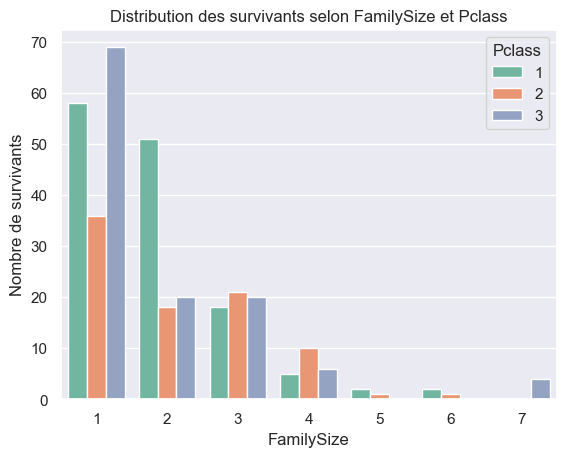

In [98]:
#Calcul du taux de survie par FamilySize et par Pclass en %
survival_rates_FamilySize_Pclass = titanic_df.groupby(['Pclass','FamilySize'])['Survived'].mean()*100
print(survival_rates_FamilySize_Pclass)

#Countplot FamilySize + Pclass → Survived  
sns.countplot(data=titanic_df[titanic_df['Survived']==1], x='FamilySize', hue='Pclass', palette='Set2', legend=True)
plt.title('Distribution des survivants selon FamilySize et Pclass')
plt.xlabel('FamilySize')
plt.ylabel('Nombre de survivants')

plt.show()

**Analyse:**  
  
**Objectif**  
Vérifier si les grandes familles étaient majoritairement en 3ème classe et comment cela a affecté leur survie.  

**Observation**  
  
**Répartition des survivants selon FamilySize et Pclass:**  
- **Familles de taille 1 (voyageant seules)** :  
  - La majorité des survivants voyageaient seuls, avec une forte proportion en 3ème classe.  
  - Le taux de survie diminue en fonction de la classe (53% en 1ère, 35% en 2ème et seulement 21% en 3ème).  
- **Petites familles (2-4 personnes)** :  
  - Ces familles ont globalement de meilleures chances de survie, en particulier en 1ère et 2ème classes.  
  - En 3ème classe, les chances restent plus faibles mais augmentent avec la taille de la famille (jusqu’à 67% pour 4 membres).  
- **Grandes familles (5+ membres)** :  
  - En 1ère et 2ème classes, certaines grandes familles ont survécu à 100%.  
  - En 3ème classe, la survie chute drastiquement :  
    - Aucune famille de 5, 6, 8 ou 11 membres n’a survécu.  
    - Seules quelques familles de 7 membres ont eu des survivants (~33%).  

**Insights potentiels**  
- **Voyager seul réduisait les chances de survie** en 3ème classe (21%), mais moins en 1ère classe (53%).  
- **Les petites familles (2-4 membres) avaient les meilleures chances de survie**, indépendamment de la classe.  
- **Les grandes familles en 3ème classe avaient quasiment aucune chance de survie**, ce qui peut être lié à des difficultés pour évacuer ensemble.  

.  
  
**Countplot: FamilySize + Sex → Survived**

Sex     FamilySize
female  1             78.571429
        2             81.609195
        3             77.551020
        4             84.210526
        5             25.000000
        6             37.500000
        7             37.500000
        8              0.000000
        11             0.000000
male    1             15.571776
        2             24.324324
        3             39.622642
        4             50.000000
        5              0.000000
        6              0.000000
        7             25.000000
        8              0.000000
        11             0.000000
Name: Survived, dtype: float64


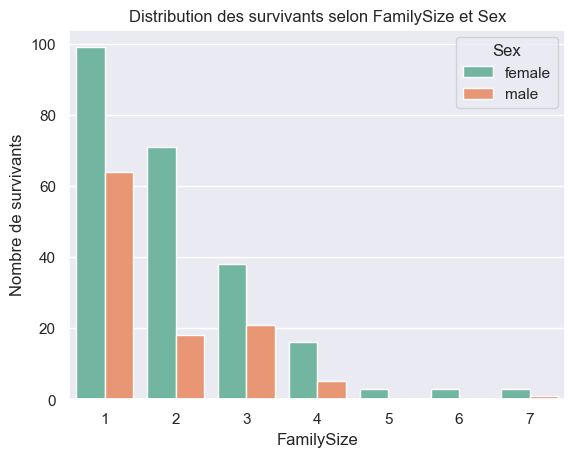

In [101]:
#Calcul du taux de survie par FamilySize et par Sex en %
survival_rates_FamilySize_Sex = titanic_df.groupby(['Sex','FamilySize'])['Survived'].mean() *100
print(survival_rates_FamilySize_Sex)

#Countplot FamilySize + Sex → Survived 
sns.countplot(data=titanic_df[titanic_df['Survived']==1], x='FamilySize', hue='Sex', palette='Set2', legend=True)
plt.title('Distribution des survivants selon FamilySize et Sex')
plt.xlabel('FamilySize')
plt.ylabel('Nombre de survivants')

plt.show()

**Analyse:**  
  
**Objectif**  
Vérifier si les femmes voyageant seules ou en petite famille avaient plus de chances de survie que les hommes.

**Observation**
- **Femmes**
  - La majorité des survivantes voyageaient seules (1) ou en petites familles (2-4 membres).
  - Le taux de survie reste **élevé** pour les petites familles (**~78-84%**).
  - Dès **5 membres**, le taux de survie chute fortement (**25% ou moins**).
  - **Aucune survivante** pour les familles de **8 membres et plus**.

- **Hommes**
  - Le taux de survie est **faible**, même pour les petites familles.
  - Les hommes seuls avaient un taux de survie de **15.6%**, bien inférieur aux femmes seules (**78.6%**).
  - Plus la taille de la famille augmente, plus le taux de survie diminue, atteignant **0%** pour les familles nombreuses (5+ membres), sauf pour FamilySize = 7 (**25%**).
  - **Aucun survivant** parmi les hommes dans des familles de **8 ou 11 membres**.


**Insights Potentiels**
- **Voyager seul ou en petite famille favorisait la survie, surtout pour les femmes.**   
- **Les grandes familles étaient particulièrement désavantagées**, probablement en raison de difficultés d’évacuation et d’accès aux canots.  
- **Les hommes, même en petite famille, avaient un taux de survie bien plus faible**, confirmant la priorité accordée aux femmes et aux enfants.  
- **Les femmes de 2 à 4 membres avaient les meilleures chances de survie (~80%)**, ce qui pourrait indiquer qu’un **certain équilibre entre soutien familial et mobilité aidait à survivre**.

.  
  
**Boxplot: FamilySize + Fare → Survived**

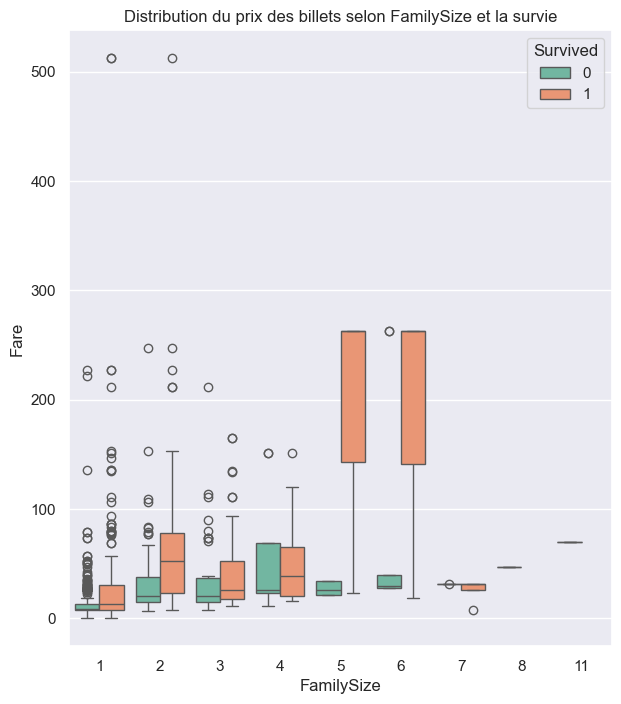

In [104]:
plt.figure(figsize=(7,8))
sns.boxplot(data=titanic_df, x='FamilySize', y='Fare', hue='Survived', palette='Set2', legend=True)
plt.title("Distribution du prix des billets selon FamilySize et la survie")
plt.xlabel("FamilySize")
plt.ylabel("Fare")

plt.show()

**Analyse:**  
  
**Objectif**  
Vérifier si les grandes familles payaient des billets moins chers, ce qui les plaçait majoritairement en classes inférieures et aurait diminué leurs chances de survie.  

**Observation**  
- **Tendance générale**  
  - Les familles de petite taille (1-4 membres) présentent une grande variabilité des prix des billets, avec de nombreux outliers.  
  - Les grandes familles (5 et plus) semblent avoir payé des billets moins chers en moyenne, bien que quelques exceptions existent.  
- **Différence entre survivants et non-survivants**  
  - Pour les petites familles (1-4), les survivants ont souvent payé des billets plus élevés.  
  - À partir de 5 membres, les prix sont globalement plus bas et l’écart entre survivants et non-survivants est moins marqué.  
  - Quelques billets coûteux apparaissent pour des familles de 6+, mais ils sont rares.  
- **Outliers**  
  - Des billets très chers (> 300) sont présents pour des passagers seuls ou en petits groupes, souvent des survivants.  
  - Ces valeurs extrêmes montrent que certaines personnes ont pu payer beaucoup plus pour améliorer leurs conditions de voyage et, potentiellement, leurs chances de survie.  

**Insights potentiels**  
- **Corrélation entre taille de la famille et classe**  
  - Les grandes familles étaient souvent associées à des billets moins chers, ce qui pourrait signifier qu’elles voyageaient en classe inférieure.  
- **Influence du prix du billet sur la survie**  
  - Les personnes ayant payé plus cher avaient tendance à mieux survivre, en particulier pour les petites familles.  
  - Cependant, pour les grandes familles, le prix semble jouer un rôle moins déterminant.  

### **5 - Autres corrélations entre l’âge, le prix et la classe**   

.  
  
**Boxplot: Age + Pclass → Survived**

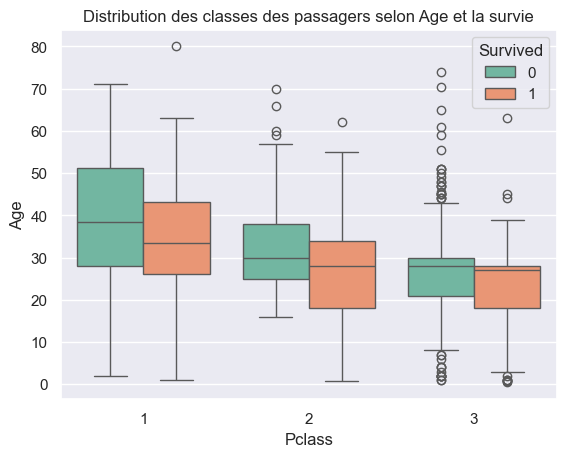

In [108]:
sns.boxplot(data=titanic_df, x='Pclass', y='Age', hue='Survived', palette='Set2', legend=True)
plt.title("Distribution des classes des passagers selon Age et la survie")
plt.xlabel("Pclass")
plt.ylabel("Age")

plt.show()

**Analyse:**  
  
**Objectif**  
Vérifier si les enfants de 3ème classe ont survécu autant que ceux de 1ère classe. 

**Observation**  
De manière générale, l’âge médian des passagers diminue avec la classe :  
 - **1ère classe** : Passagers plus âgés en moyenne (~38-40 ans).  
 - **2ème classe** : Passagers d’âge intermédiaire (~30 ans).  
 - **3ème classe** : Passagers plus jeunes en moyenne (~25 ans).
   
Les survivants ont tendance à être plus jeunes que les non-survivants dans **chaque classe**.  
- **1ère classe** : Les survivants et les non-survivants ont des distributions d’âge similaires, bien que les survivants aient un âge médian légèrement plus bas (~35 ans contre ~40 ans).  
- **2ème classe** : Les survivants sont un peu plus jeunes que les non-survivants.  
- **3ème classe** : On observe une concentration plus élevée d’enfants parmi les survivants.  

**Insights potentiels**  
- **Âge et classe sont liés** : Les passagers des classes inférieures étaient plus jeunes en moyenne.  
- **Effet protecteur pour les enfants en 3ème classe** : On observe que les plus jeunes passagers (en particulier en 3ème classe) avaient plus de chances de survie, bien que l’avantage de la première classe reste évident.  
- **Différence moins marquée en 1ère classe** : L’âge semble jouer un rôle moins déterminant pour la survie des passagers de 1ère classe, comparé à la 3ème classe où les enfants ont bénéficié de la priorité à l’évacuation.  

.  
  
**Sactterplot: Age + Fare → Survived**

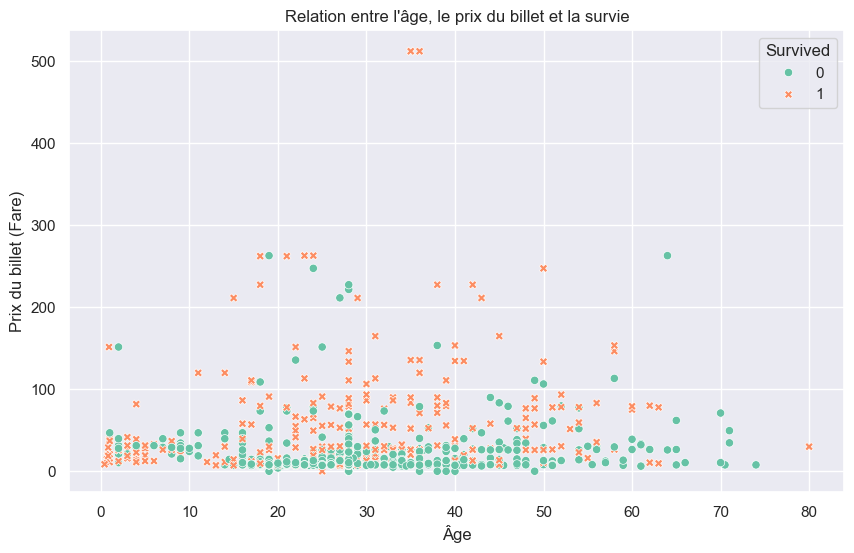

In [111]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived', style='Survived', palette='Set2')
plt.title("Relation entre l'âge, le prix du billet et la survie")
plt.xlabel("Âge")
plt.ylabel("Prix du billet (Fare)")

plt.show()

> ⚠️ **Note :** Nous n'avons pas utilisé un violin plot ou un boxplot car le résultat ne serait pas lisible. En effet, Age et Fare sont des variables numériques continue. 
Fare va environ de 0 a 500 et Age environ de 0 a 90.

**Analyse:**  
  
**Objectif**  
Vérifier si les passagers plus âgés payaient des billets plus chers et si cela influençait leurs chances de survie.

**Observation**  
- La majorité des billets coûte moins de 100, quelle que soit la tranche d'âge.
- Quelques billets très chers (plus de 200-300) ont été achetés, principalement par des survivants.
- Les jeunes passagers (0-20 ans) présentent une forte dispersion des prix, certains ayant payé des billets très chers.
- Les passagers plus âgés (au-delà de 60 ans) semblent avoir payé des billets à des prix modérés.
- Les survivants sont souvent associés à des billets plus chers, bien que ce ne soit pas une règle systématique.

**Insights potentiels**  
- Les passagers ayant payé des billets plus élevés avaient en moyenne de meilleures chances de survie.
- Le lien entre l’âge et le prix du billet n’est pas strictement linéaire : bien que certains jeunes aient payé des billets chers, les prix les plus élevés semblent être associés à des adultes de 20 à 50 ans.
- Le prix du billet pourrait être influencé par la classe et le port d’embarquement, nécessitant une analyse croisée avec ces variables.

### **6 - Facteurs liés aux cabines** 

.  
  
**Countplot: Has_Cabin + Pclass + Sex → Survived**

Has_Cabin  Pclass  Sex   
0          1       female    100.000000
                   male       22.222222
           2       female     92.424242
                   male       12.745098
           3       female     49.275362
                   male       13.196481
1          1       female     96.296296
                   male       41.052632
           2       female     90.000000
                   male       66.666667
           3       female     66.666667
                   male       33.333333
Name: Survived, dtype: float64


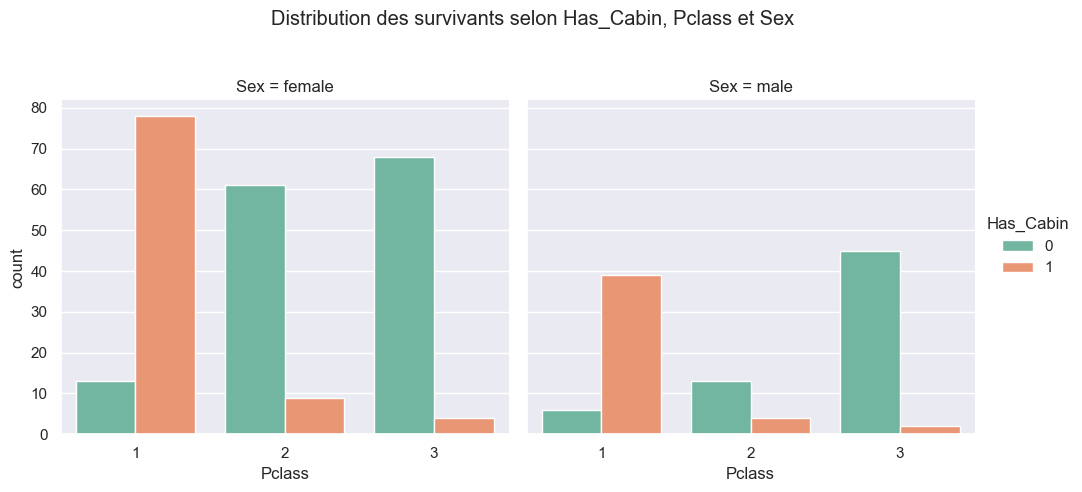

In [116]:
#Calcul du taux de survie par Has_Cabin, Pclass et par Sex en %
survival_rates_Has_Cabin_Pclass_Sex = titanic_df.groupby(['Has_Cabin','Pclass','Sex'])['Survived'].mean() *100
print(survival_rates_Has_Cabin_Pclass_Sex)

# Countplot Has_Cabin + Pclass + Sex → Survived  
sns.catplot(
    data=titanic_df[titanic_df['Survived'] == 1], 
    x='Pclass', 
    hue='Has_Cabin', 
    col='Sex',  # Affiche un graphique pour chaque sexe
    kind='count',
    palette='Set2'
)

plt.subplots_adjust(top=0.8)
plt.suptitle("Distribution des survivants selon Has_Cabin, Pclass et Sex")
plt.show()

**Analyse:**  
  
**Objectif**  
Vérifier si les femmes de première classe avaient presque systématiquement des cabines et comment cela a influencé leur survie.  

**Observation**  
Répartition des survivants en fonction de Has_Cabin et Pclass  
- **Femmes en 1ère classe** :  
  - La majorité des survivantes avaient une cabine (**96.3%**).  
  - Celles sans cabine ont toutes survécu (**100%**), mais elles étaient peu nombreuses.  
- **Femmes en 2ème classe** :  
  - Les survivantes avec une cabine ont un taux de survie élevé (**90%**).  
  - Les femmes sans cabine ont également un fort taux de survie (**92.4%**).  
- **Femmes en 3ème classe** :  
  - **66.7%** des survivantes avaient une cabine.  
  - **49.3%** des survivantes n’avaient pas de cabine, un taux bien inférieur aux autres classes.  
- **Hommes en 1ère classe** :  
  - Les survivants avec une cabine ont un taux de survie de **41%**.  
  - Ceux sans cabine ont un taux de survie bien plus faible (**22.2%**).  
- **Hommes en 2ème classe** :  
  - Les survivants avec une cabine ont un taux de survie élevé (**66.7%**).  
  - Ceux sans cabine ont un taux de survie faible (**12.7%**).  
- **Hommes en 3ème classe** :  
  - Seuls **33.3%** des hommes avec cabine ont survécu.  
  - Seuls **13.2%** des hommes sans cabine ont survécu, le taux le plus bas observé.  

**Insights potentiels**  
- ***Présence d’une cabine et survie***  
  - Avoir une cabine était un facteur de survie important, en particulier pour les **hommes**.  
  - Les **femmes** avaient un taux de survie élevé même sans cabine, surtout en **1ère et 2ème classe**.  
  - En **3ème classe**, le taux de survie des femmes était bien plus bas sans cabine (**49.3%**).  
- ***Influence de la classe***  
  - Les **femmes de première classe** avaient un accès quasi systématique aux cabines.  
  - En **2ème classe**, la répartition entre cabine et non-cabine était plus équilibrée.  
  - En **3ème classe**, la majorité des survivants n’avaient pas de cabine, indiquant une probable difficulté d’accès aux canots.  

.  
  
**Boxplot: Has_Cabin + Fare → Survived**

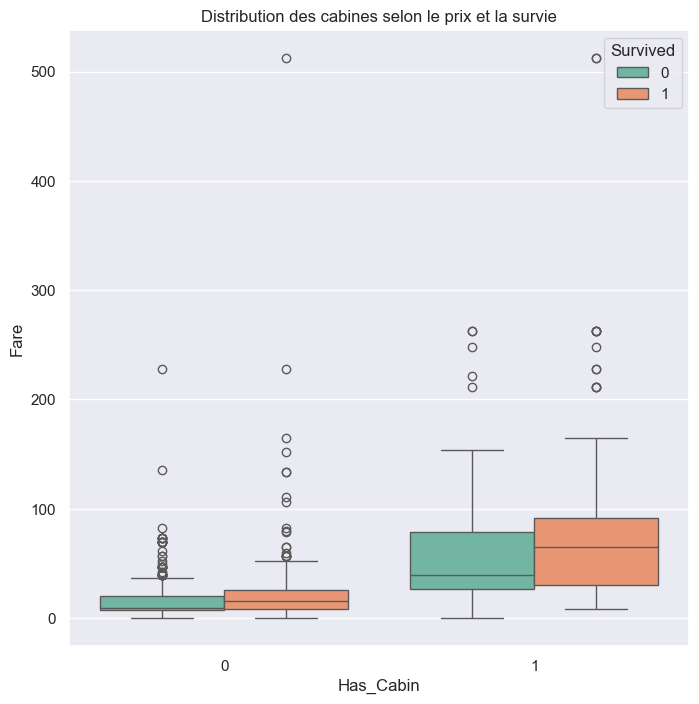

In [119]:
plt.figure(figsize=(8,8))
sns.boxplot(data=titanic_df, x='Has_Cabin', y='Fare', hue='Survived', palette='Set2', legend=True)
plt.title("Distribution des cabines selon le prix et la survie")
plt.xlabel("Has_Cabin")
plt.ylabel("Fare")

plt.show()

**Analyse:**  
  
**Objectif**  
Vérifier si le prix du billet influençait l’accès aux cabines et si cela avait un impact sur la survie des passagers.

**Observation**  
- Les passagers ayant une cabine (Has_Cabin = 1) ont payé des billets significativement plus chers en moyenne que ceux sans cabine (Has_Cabin = 0).
- La médiane du prix des billets est bien plus élevée pour les passagers avec cabine.
- Les passagers sans cabine ont une distribution de prix plus concentrée vers les bas prix, avec quelques outliers correspondant à des billets plus chers.
- Les survivants et les non-survivants ont des distributions similaires à l’intérieur de chaque catégorie (Has_Cabin = 0 ou 1), bien que les passagers avec cabine aient un taux de survie globalement plus élevé.

**Insights potentiels**  
- L’accès aux cabines semble fortement corrélé au prix du billet : les billets les plus chers donnaient souvent accès à une cabine.
- Comme vu précédemment, avoir une cabine augmentait significativement les chances de survie, ce qui indique une forte inégalité d’accès aux moyens de sauvetage selon la classe et le prix du billet.
- Les passagers sans cabine avaient généralement des billets moins chers et un taux de survie plus faible, confirmant que les classes les plus aisées avaient un avantage en termes de survie.

.  
  
**Boxplot: Has_Cabin + Fare + Embarked → Survived**

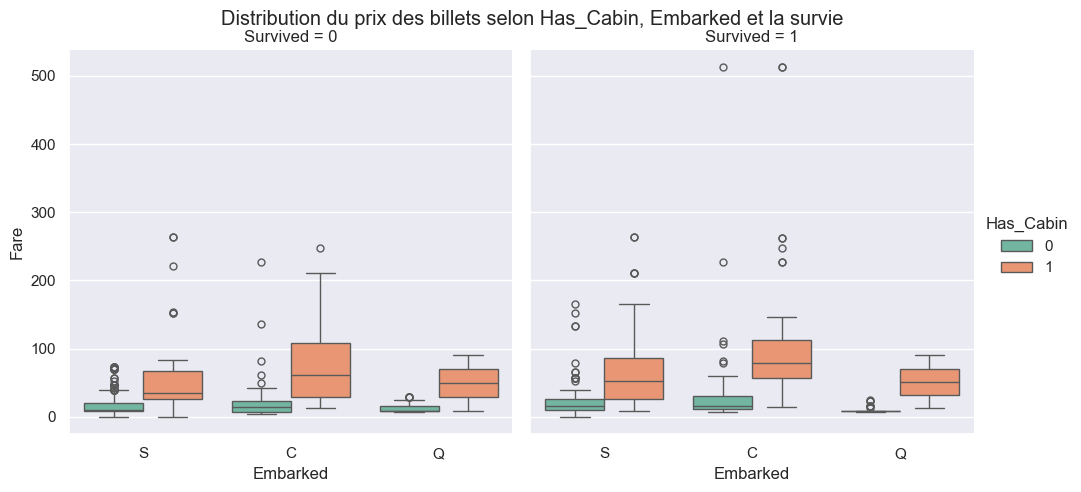

In [122]:
# Boxplot Has_Cabin + Fare + Embarked → Survived  
g = sns.catplot(
    data=titanic_df, 
    x='Embarked', 
    y='Fare', 
    hue='Has_Cabin', 
    kind='box', 
    col='Survived', 
    palette='Set2'
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution du prix des billets selon Has_Cabin, Embarked et la survie")
plt.show()


**Analyse:**

**Objectif**  
Vérifier si les passagers ayant payé les billets les plus chers et embarquant à Cherbourg avaient plus souvent des cabines, et si cela influençait leur survie.  

**Observation**
- Répartition des prix par port d’embarquement
  - **Southampton (S)** :  
    - Les billets couvrent une large gamme de prix, avec une concentration sous 100 unités.  
    - Peu de passagers sans cabine ont payé des billets élevés.  
    - Ceux avec cabine ont tendance à avoir des billets plus chers, bien que certains billets restent abordables.  
  - **Cherbourg (C)** :  
    - Les prix des billets sont **plus élevés** en moyenne que pour les autres ports.  
    - Les passagers avec cabine y sont proportionnellement plus nombreux.  
    - La médiane du prix est significativement plus élevée que dans les autres ports.  
  - **Queenstown (Q)** :  
    - Majoritairement des billets à bas prix.  
    - Peu de passagers avec cabine.  
    - Très peu de billets chers, et ceux qui le sont ne garantissent pas nécessairement la survie.  
- Différence entre survivants et non-survivants  
  - **Les survivants ont globalement payé plus cher leurs billets.**  
  - **Les passagers avec cabine ont un avantage net en matière de survie**, surtout parmi ceux ayant embarqué à Cherbourg.  
  - **À Queenstown, la majorité des passagers ont acheté des billets bon marché et peu avaient une cabine.**  

**Insights potentiels**  
- **Influence du port d’embarquement**  
  - Les passagers embarquant à Cherbourg avaient plus souvent une cabine, ce qui a probablement contribué à leur **meilleur taux de survie**.  
  - Southampton était plus hétérogène en termes de prix et de possession de cabine.  
  - Queenstown était **majoritairement composé de passagers sans cabine et avec des billets peu coûteux**, expliquant leur faible taux de survie.  
- **Relation entre prix du billet et survie**  
  - Les passagers avec les billets les plus chers avaient **plus de chances de survivre**, particulièrement ceux ayant embarqué à Cherbourg et disposant d’une cabine.  

---
# **5- Détection et traitement des outliers** 
Après avoir exploré les relations entre les variables et la survie, il est essentiel d’identifier les valeurs aberrantes qui pourraient biaiser nos analyses et modèles. Cette section vise à détecter, analyser et traiter ces valeurs extrêmes pour garantir une interprétation fiable des résultats.

## Pourquoi identifier et traiter les outliers ?  
Les outliers peuvent fausser les analyses en influençant fortement les moyennes et les corrélations. Leur détection maintenant permet d’évaluer leur impact après l’exploration univariée et multivariée. Selon leur nature, ils peuvent être conservés, transformés ou supprimés pour améliorer la robustesse des modèles prédictifs et éviter des biais dans l’interprétation des résultats.

### **1 - Détection des outliers**  
Avant toute transformation, nous devons identifier les outliers dans nos variables numériques principales :  
- **Boxplots** : Visualisation des valeurs extrêmes pour **Age** et **Fare** afin de repérer les observations anormalement élevées ou basses.  
- **Statistiques descriptives** : Calcul de la médiane, des quartiles, et des valeurs min/max pour comprendre la dispersion des données et repérer d’éventuelles anomalies.

**Objectif :** Identifier visuellement et statistiquement les valeurs extrêmes.

### **2 - Analyse des valeurs aberrantes**  
Une fois les valeurs extrêmes détectées, il est essentiel d’évaluer leur pertinence et leur impact sur les analyses afin de déterminer la meilleure approche pour les traiter.
- **Identification et analyse des valeurs extrêmes**  
À partir des boxplots et des statistiques descriptives, identifier les observations qui se démarquent significativement des autres :
  - Détecter les valeurs très élevées ou très basses et vérifier si elles sont plausibles.
  - Comparer ces valeurs aux percentiles pour repérer les écarts anormaux.
- **Impact des valeurs extrêmes sur l'analyse**  
  - Vérification des statistiques descriptives : Comparer la moyenne et la médiane pour identifier une asymétrie due aux valeurs extrêmes.
  - Visualisation de la distribution : Utiliser des histogrammes et des courbes de densité pour observer comment ces valeurs influencent la répartition globale des données.
  - Analyse de l’effet sur les indicateurs statistiques : Examiner l’influence des outliers sur la moyenne, l’écart-type et la variance pour déterminer s’ils biaisent les conclusions.
Ces analyses permettront d’évaluer si ces valeurs doivent être conservées, transformées ou supprimées pour garantir la robustesse des résultats.

**Objectif :** Evaluer si ces valeurs doivent être conservées *(valeurs légitimes)*, transformées ou supprimées pour garantir la robustesse des résultats.
  
### **3 - Traitement des outliers**  
Plusieurs approches sont possibles selon la nature et l’impact des valeurs extrêmes :  
- **Les conserver** : Si elles sont justifiées et apportent des informations pertinentes.  
- **Les transformer** : Appliquer une transformation logarithmique sur **Fare** (*np.log1p(Fare)*) pour atténuer l’effet des valeurs extrêmes tout en conservant l’information.  
- **Les supprimer** : Si elles perturbent l’analyse et semblent non représentatives du phénomène étudié.   

**Objectif :** Prendre des décisions éclairées sur ces valeurs afin d'améliorer la robustesse des analyses et la performance des futurs modèles prédictifs.

### **4 - Application des résultats et vérification de la nouvelle distribution**  
Après avoir analysé l'impact des valeurs extrêmes, il est temps d’appliquer les ajustements nécessaires et d’évaluer leur effet sur la distribution des données.  

- **Mise en œuvre du traitement des outliers** : Appliquer la stratégie choisie en fonction des observations faites lors de l’analyse.  
- **Visualisation des distributions avant et après traitement** :  
  - Génération d’histogrammes et de courbes de densité pour comparer la répartition des valeurs.  
  - Analyse de la dispersion des données et de l’effet de la transformation sur les outliers.  
- **Impact sur les indicateurs statistiques** :  
  - Comparaison de la **moyenne, médiane et écart-type** avant et après traitement pour évaluer les changements.  
  - Vérification que l’ajustement améliore la stabilité des données tout en conservant les tendances principales.  

**Objectif :** Implémenter les ajustements nécessaires, s’assurer de leur bon déroulement et vérifier qu’ils permettent une meilleure interprétation des données sans perte d’informations importantes.

.

### **1 - Détection des outliers**  

.  
  
**Boxplot: Age et Fare**  
*La detection des outliers se fait sur **Age** et **Fare** car ce sont les 2 seules variables numériques continues que nous possédons et que c'est ce type de variable qui est particulièrement sensibles aux valeurs extêmes.*

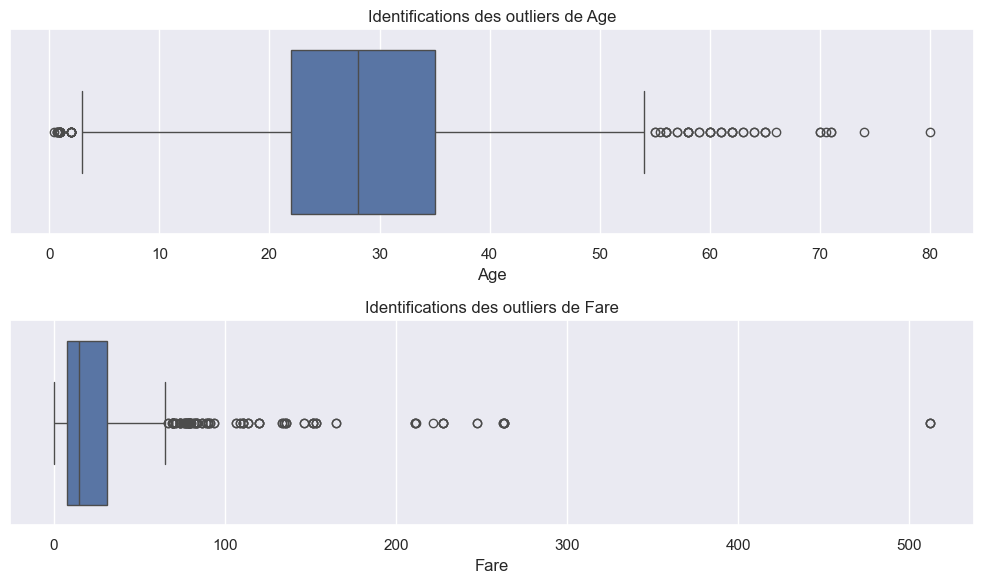

In [127]:
# Liste des colonnes Age et Fare
Age_Fare_cols = ['Age', 'Fare']

# Création des Boxplots
plt.figure(figsize=(10,6))
for i, col in enumerate(Age_Fare_cols, 1):
    plt.subplot(2, 1, i)
    sns.boxplot(data=titanic_df, x=col)
    plt.title(f"Identifications des outliers de {col}")
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()


> ⚠️ **Note :**  
Les outliers *(valeurs extêmes)* sont définis comme suit:  
IQR=***Q3−Q1***  
Outliers: ***X<Q1−1.5\*IQR ou X>Q3+1.5\*IQR***

.  
  
**Statistiques descriptives: Age et Fare**  

In [130]:
print(titanic_df[['Age', 'Fare']].describe())
print("\nVariance de Age :", titanic_df["Age"].var())
print("\nVariance de Fare :", titanic_df["Fare"].var())

              Age        Fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200

Variance de Age : 169.51249827942328

Variance de Fare : 2469.436845743117


### **2 - Analyse des valeurs aberrantes**  
Après avoir identifié les valeurs extrêmes à l’aide des boxplots, nous analysons leur impact en nous basant sur les statistiques descriptives et les distributions des variables Age et Fare.

.  
  
**Identification et analyse des valeurs extrêmes: Age et Fare**  

**Analyse:**   
  
$$\textbf{Age}$$
**Observation:**  
- Plage des valeurs : 0.42 à 80 ans.
- Distribution centrale :
- Médiane (50%) = 28 ans.
- IQR (Interquartile Range : Q3-Q1) = 35 - 22 = 13 ans.
- Seuils des outliers (définition classique : Q1 - 1.5IQR et Q3 + 1.5IQR) :
  - Inférieur à : 22 - (1.5 * 13) = 2.5 ans.
  - Supérieur à : 35 + (1.5 * 13) = 54.5 ans.
- Valeurs extrêmes détectées :
  - Très jeunes passagers (< 2.5 ans) : Possibles nourrissons, cohérent avec un voyage transatlantique familial.
  - Passagers âgés (> 54.5 ans) : La majorité étaient en 1ère classe, ce qui est confirmé par l'analyse multivariée.  

**Interpretation:**  
Ces valeurs ne semblent pas être des erreurs, mais des données valides reflétant la population du Titanic.  
.    
$$\textbf{Fare (Prix du billet)}$$
**Observation:**  
- Plage des valeurs : 0 à 512.33.
- Distribution centrale :
  - Médiane (50%) = 14.45.
  - IQR (Interquartile Range : Q3-Q1) = 31 - 7.91 = 23.09.
  - Seuils des outliers :
    - Inférieur à : 7.91 - (1.5 * 23.09) = -26.73 → Aucun billet négatif.
    - Supérieur à : 31 + (1.5 * 23.09) = 66.63.
- Valeurs extrêmes détectées :
  - Fare = 0 : Erreur de saisie ou billets gratuits ?
  - Fare > 66.63 :
    - Billets allant jusqu’à 512.33 : Majoritairement en 1ère classe.
    - Forte asymétrie avec une minorité de billets très chers.  
  
**Interpretation:**  
Ces valeurs extrêmes influencent la distribution, justifiant potentiellement une transformation logarithmique pour réduire leur effet.  



.  
  
**Impact des valeurs extrêmes sur l'analyse**  

Nous avons identifié des valeurs extrêmes pour Age et Fare dans les boxplots et les statistiques descriptives. Il est essentiel d'examiner leur impact sur la distribution des données et les analyses.

1- ***Vérification des statistiques descriptives***  
  Nous avons comparé la moyenne et la médiane pour évaluer l'influence des valeurs extrêmes sur la répartition des données :
  - Pour Age, la moyenne (29.36) est proche de la médiane (28), ce qui suggère une distribution relativement équilibrée.
  - Pour Fare, la moyenne (32.20) est nettement plus élevée que la médiane (14.45), indiquant une forte asymétrie causée par quelques valeurs très élevées.
.  
 
.  

Pour mieux comprendre l’effet de ces valeurs extrêmes nous allons créer des ***histogrammes et courbes de densité (KDE)*** pour observer la répartition globale des données.

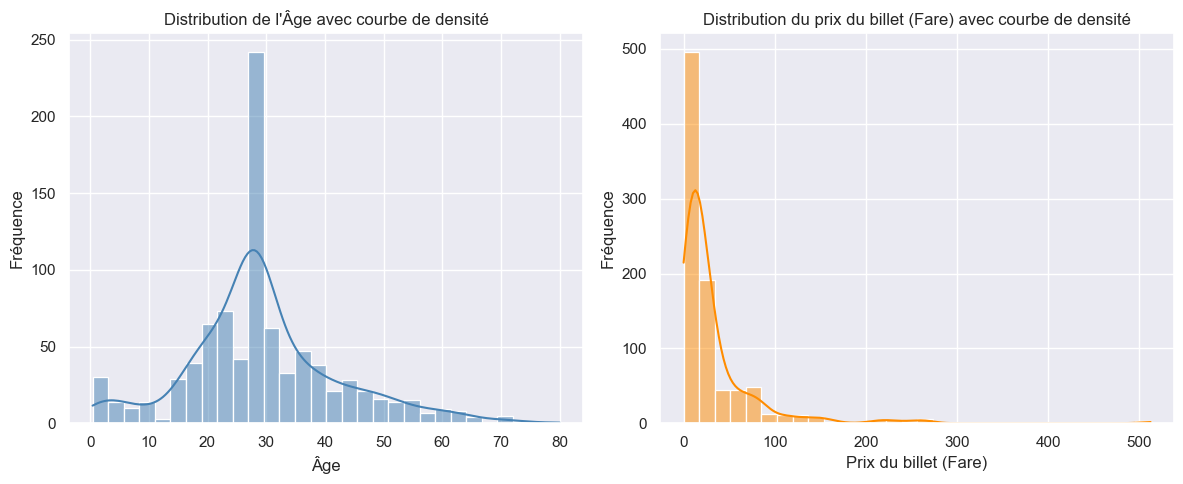

In [136]:
plt.figure(figsize=(12, 5))

# Histogramme et KDE pour Age
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['Age'], bins=30, kde=True, color='steelblue')
plt.title("Distribution de l'Âge avec courbe de densité")
plt.xlabel("Âge")
plt.ylabel("Fréquence")

# Histogramme et KDE pour Fare
plt.subplot(1, 2, 2)
sns.histplot(titanic_df['Fare'], bins=30, kde=True, color='darkorange')
plt.title("Distribution du prix du billet (Fare) avec courbe de densité")
plt.xlabel("Prix du billet (Fare)")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

2- ***Visualisation de la distribution***


  - **Observation et Interpretation:**  
    - ***Age***, bien que concentré autour de la trentaine, présente quelques valeurs élevées (au-delà de 65 ans), qui restent néanmoins cohérentes avec la démographie des passagers du Titanic.  
    - ***Fare*** montre une longue traîne vers la droite (right-skewed), confirmant un déséquilibre causé par des prix de billets exceptionnellement élevés.  
  
.  
3- ***Analyse de l'effet sur les indicateurs statistiques***  
  Nous avons examiné l’influence des valeurs extrêmes sur :  
  - ***L’écart-type et la variance :***
    - ***Fare*** affiche une grande dispersion avec une variance élevée (2469.86) et un écart-type de 49.69, ce qui confirme que certaines valeurs sont très éloignées de la moyenne.
    - ***Age*** a une variance de 169.52 et un écart-type de 13.02, ce qui limite son impact négatif sur les analyses.
  - ***Les corrélations et modèles futurs :***
    - Des valeurs extrêmes sur Fare pourraient biaiser certaines analyses et modèles prédictifs, rendant une transformation nécessaire.
    - Age, en revanche, peut être conservé tel quel car son impact est limité.  

.  
**Conclusion :**
  - ***Age*** : Pas d’intervention nécessaire, ***les valeurs extrêmes semblent légitimes***.
  - ***Fare*** : ***Une transformation logarithmique est recommandée*** pour atténuer l’effet des valeurs élevées.


### **3 - Traitement des outliers**
Maintenant que nous avons identifié et analysé les valeurs extrêmes dans Age et Fare, nous devons décider de la meilleure approche pour les traiter afin d'éviter qu'elles ne biaisent nos analyses et modèles prédictifs.

**Les conserver**  
- **Cas de Age :**
  - Les valeurs extrêmes d'âge (très jeunes ou très âgés) semblent cohérentes avec les passagers du Titanic. Elles sont donc conservées.
  - Elles ne modifient pas de manière significative la moyenne et l'écart-type.
- **Cas de Fare :**
  - Certains billets gratuits (Fare = 0) pourraient être des erreurs de saisie ou des billets offerts (personnel du bateau, invités spéciaux ?).
  - Les billets très chers (> 500) correspondent probablement aux passagers de 1ère classe et ne semblent pas être des anomalies.
.  
  
**Les trasformer**  
- **Pourquoi ?**
  - La distribution de Fare est fortement asymétrique (forte traîne vers les valeurs élevées).
  - Une transformation logarithmique permet de réduire cet effet tout en conservant l'information clé.
- **Méthode utilisée :**
  - Transformation logarithmique : Application de np.log1p(Fare), qui permet de lisser la distribution en conservant les valeurs nulles.
.  
  
**Les supprimer**  
- **Pourquoi ?**
  - La suppression des valeurs extrêmes ne se justifie pas ici, car elles représentent des cas réels et ne sont pas des erreurs évidentes.
- **Décision :**
  - Aucune suppression de valeurs extrêmes dans notre dataset.

### **4 - Application des résultats et vérification de la nouvelle distribution**  
Maintenant que nous avons détecté, analysé et traité les valeurs extrêmes, nous devons intégrer ces décisions dans notre analyse et vérifier leur impact sur la distribution des données.²

.  
  
**Mise en œuvre du traitement des outliers**

In [142]:
# Appliquer la transformation logarithmique à la colonne 'Fare'
titanic_df['Fare_log'] = np.log1p(titanic_df['Fare'])

# Vérifier l'ajout de la colonne en affichant quelques lignes
print(titanic_df[['Fare', 'Fare_log']].head())

# Vérifier si des valeurs nulles ou incohérentes ont été générées
print("\n",titanic_df['Fare_log'].describe())

      Fare  Fare_log
0   7.2500  2.110213
1  71.2833  4.280593
2   7.9250  2.188856
3  53.1000  3.990834
4   8.0500  2.202765

 count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: Fare_log, dtype: float64


.  
  
**Visualisation des distributions avant et après traitement**

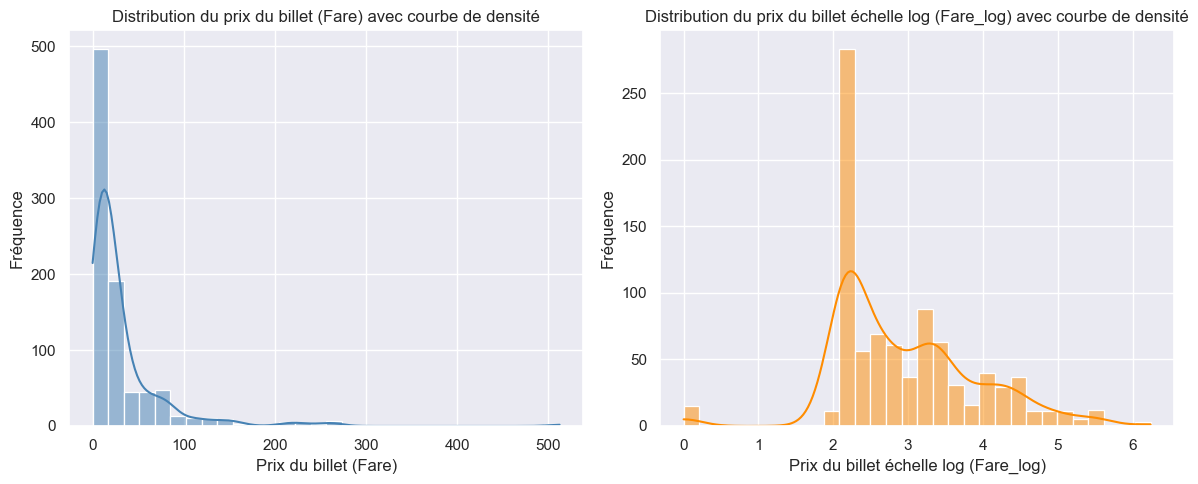

In [144]:
plt.figure(figsize=(12, 5))

# Histogramme et KDE pour Fare
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['Fare'], bins=30, kde=True, color='steelblue')
plt.title("Distribution du prix du billet (Fare) avec courbe de densité")
plt.xlabel("Prix du billet (Fare)")
plt.ylabel("Fréquence")

# Histogramme et KDE pour Fare_log
plt.subplot(1, 2, 2)
sns.histplot(titanic_df['Fare_log'], bins=30, kde=True, color='darkorange')
plt.title("Distribution du prix du billet échelle log (Fare_log) avec courbe de densité")
plt.xlabel("Prix du billet échelle log (Fare_log)")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

**Impact sur les indicateurs statistiques**

**1 - Distribution avant transformation (Fare)**
- La variable *Fare* présente une **forte asymétrie à droite** (*right-skewed*), avec une longue traîne s’étendant jusqu'à 500.
- La majorité des billets sont à **faible coût**, mais quelques valeurs extrêmes impactent fortement la distribution.
- On observe une **concentration élevée de billets à 0**.

**2 - Distribution après transformation (Fare_log)**
- La transformation logarithmique a **réduit l’asymétrie**, rendant la distribution plus proche d’une courbe normale.
- La dispersion est moins extrême : les valeurs élevées sont mieux équilibrées, avec une meilleure répartition autour de la médiane.
- La traîne a été **fortement raccourcie**, rendant la distribution plus **exploitable pour l’analyse et la modélisation**.

**3 - Comparaison des indicateurs statistiques**
| Statistique | Fare (original) | Fare_log (après transformation) |
|------------|----------------|-------------------------------|
| Moyenne    | 32.20          | 2.96                          |
| Médiane    | 14.45          | 2.73                          |
| Écart-type | 49.69          | 0.97                          |
| Min - Max  | 0 - 512.33     | 0 - 6.24                      |

- **Réduction de l'écart entre la moyenne et la médiane** :  
  - *Fare* avait une différence importante entre **moyenne (32.20)** et **médiane (14.45)**, signe d’une asymétrie.  
  - *Fare_log* réduit cet écart (**moyenne : 2.96, médiane : 2.73**), indiquant une meilleure répartition des valeurs.  
- **Écart-type réduit** : L’échelle logarithmique **réduit la variance** tout en conservant les différences entre petits et grands billets.

**Conclusion :**
  - La transformation logarithmique était **nécessaire et efficace** pour corriger la forte asymétrie de *Fare*.
  - *Fare_log* est **plus adapté aux analyses et modèles prédictifs**, car il limite l’influence des valeurs extrêmes.
  - Aucune information pertinente n’a été perdue, les tendances globales restent visibles tout en améliorant la stabilité statistique.


# **6 - Synthèse des résultats et insights clés**

Après l’analyse approfondie des données, nous pouvons tirer des conclusions sur les principaux facteurs ayant influencé la survie des passagers du Titanic.

## **1 - Facteurs sociodémographiques influençant la survie**
### **Sexe**  
- **Taux de survie des femmes** : ~**74%**  
- **Taux de survie des hommes** : ~**19%**  
- Confirme une forte disparité liée à la règle *"women and children first"*.  
 
### **Âge**  
- **Taux de survie des enfants (≤10 ans)** : ~**59%**
- **Taux de survie des adolescents (11-17ans)** : ~**43 %**
- **Taux de survie des adultes (18-50 ans)** : ~**36%**
- **Taux de survie des seniors (51-59 ans)** : ~**40%**  
- **Taux de survie des personnes âgées (≥60 ans)** : ~**22%**  
- Les jeunes enfants ont bénéficié d’un avantage, tandis que les personnes âgées ont eu un taux de survie réduit.

### **Classe (Pclass)**  
- **Taux de survie en 1ère classe** : ~**63%**  
- **Taux de survie en 2ème classe** : ~**47%**  
- **Taux de survie en 3ème classe** : ~**24%**  
- Confirme une forte inégalité d’accès aux canots de sauvetage.  

## **2 - Influence des caractéristiques du billet**
### **Prix du billet (Fare)**  
- **Moyenne du prix du billet des survivants** : ~**48.4**  
- **Moyenne du prix du billet des non-survivants** : ~**22.12**  
- Confirme une corrélation entre le prix du billet et la survie.  

### **Cabines (Has_Cabin)**  
- **Taux de survie des passagers ayant une cabine** : ~**67%**  
- **Taux de survie des passagers sans cabine** : ~**30%**  
- La présence d’une cabine était un indicateur fort d’un meilleur accès aux canots.  

## **3 - Impact du port d'embarquement**  
- **Cherbourg (C)** : **Taux de survie ~55%** (majorité de passagers en 1ère classe).  
- **Southampton (S)** : **Taux de survie ~34%** (majorité de passagers en 3ème classe).  
- **Queenstown (Q)** : **Taux de survie ~39%** (principalement des passagers en 3ème classe).  

## **4 - Influence de la taille des familles**  
- **Voyager seul(e)** : **Taux de survie ~30%**.  
- **Petites familles (2-3 personnes)** : **Taux de survie ~50%**.  
- **Grandes familles (≥4 personnes)** : **Taux de survie ~23%**.  

---
## **Conclusion finale**  
L’analyse a révélé que **le sexe, la classe, le prix du billet et la présence d’une cabine** étaient les principaux facteurs influençant la survie des passagers du Titanic.  

- **Les femmes et les enfants** avaient significativement plus de chances de survivre.  
- **La classe** a joué un rôle crucial, avec une nette supériorité de survie en 1ère classe.  
- **Le prix du billet et la présence d’une cabine** étaient des indicateurs forts de la survie.  
- Le taux de survie était plus élevé parmi les passagers embarquant à Cherbourg, **principalement en raison de leur forte proportion en 1ère classe**.
- **La taille de la famille influençait également la survie**, les grandes familles ayant des difficultés à évacuer ensemble.  


# **Possibles explorations futures**
- Tester des techniques de Machine Learning pour prédire la survie.
- Explorer des visualisations plus avancées (diagrammes en réseau, heatmaps détaillées).